In [18]:
from nearline_helpers import *
import json
%jsroot on

In [19]:
runs = [
    # 316,
    318
    # 306
]
t = r.TChain('tree')
for run in runs:
    t.Add(f"../bin/*run*{run}*00020*root")
    # t.Add(f"../bin/*run*{run}*00000*root")
t.GetEntries()

9405

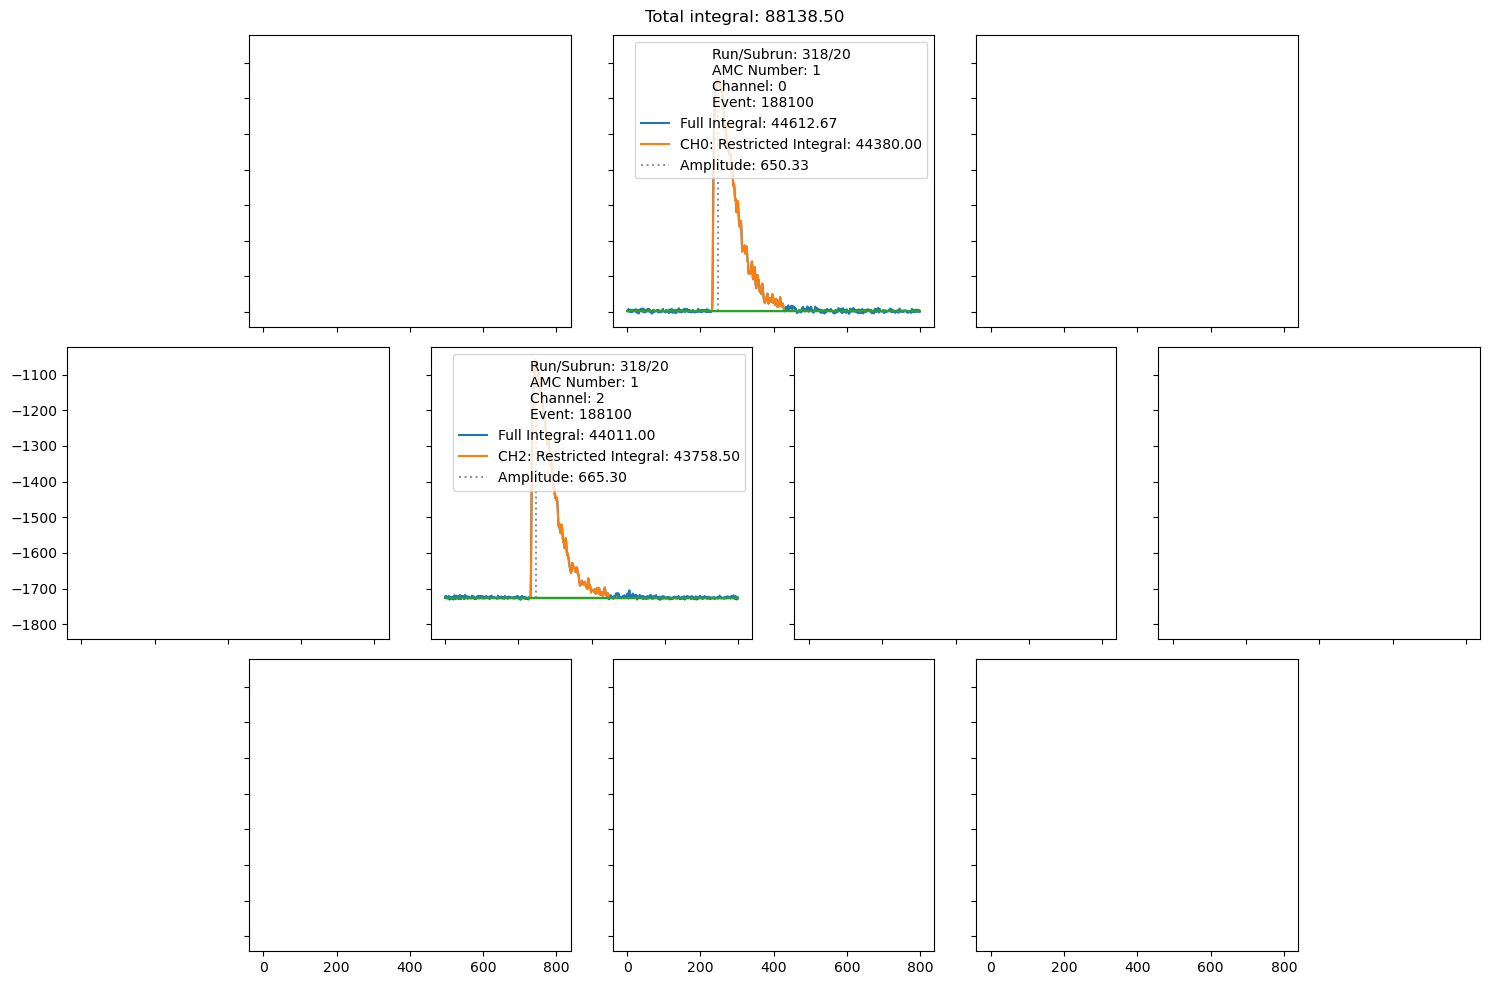

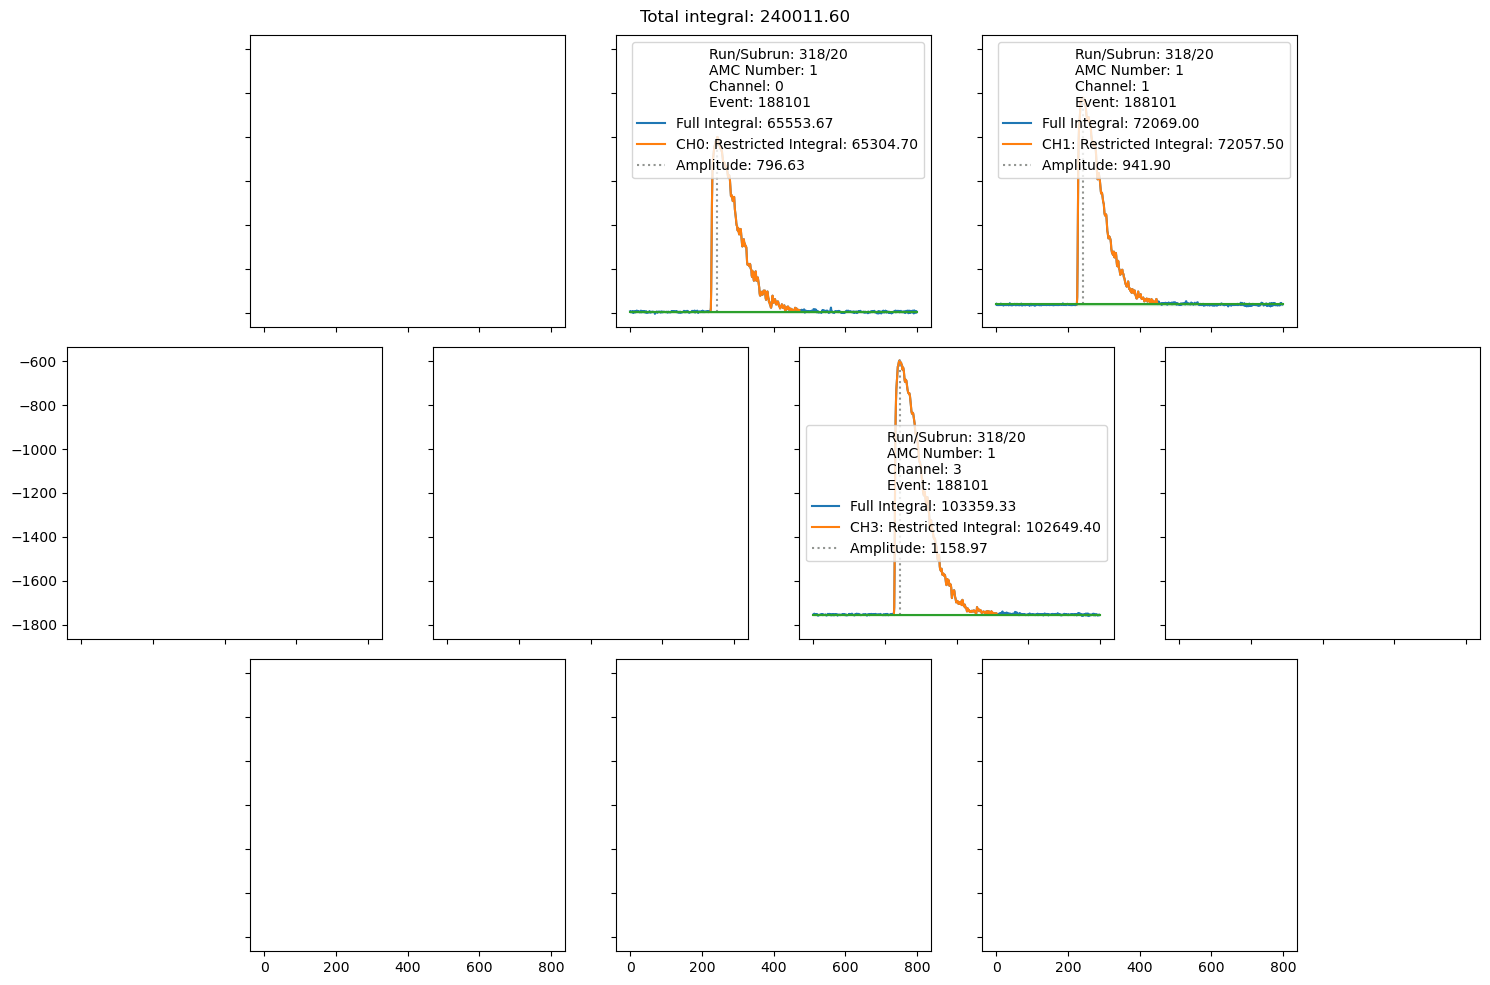

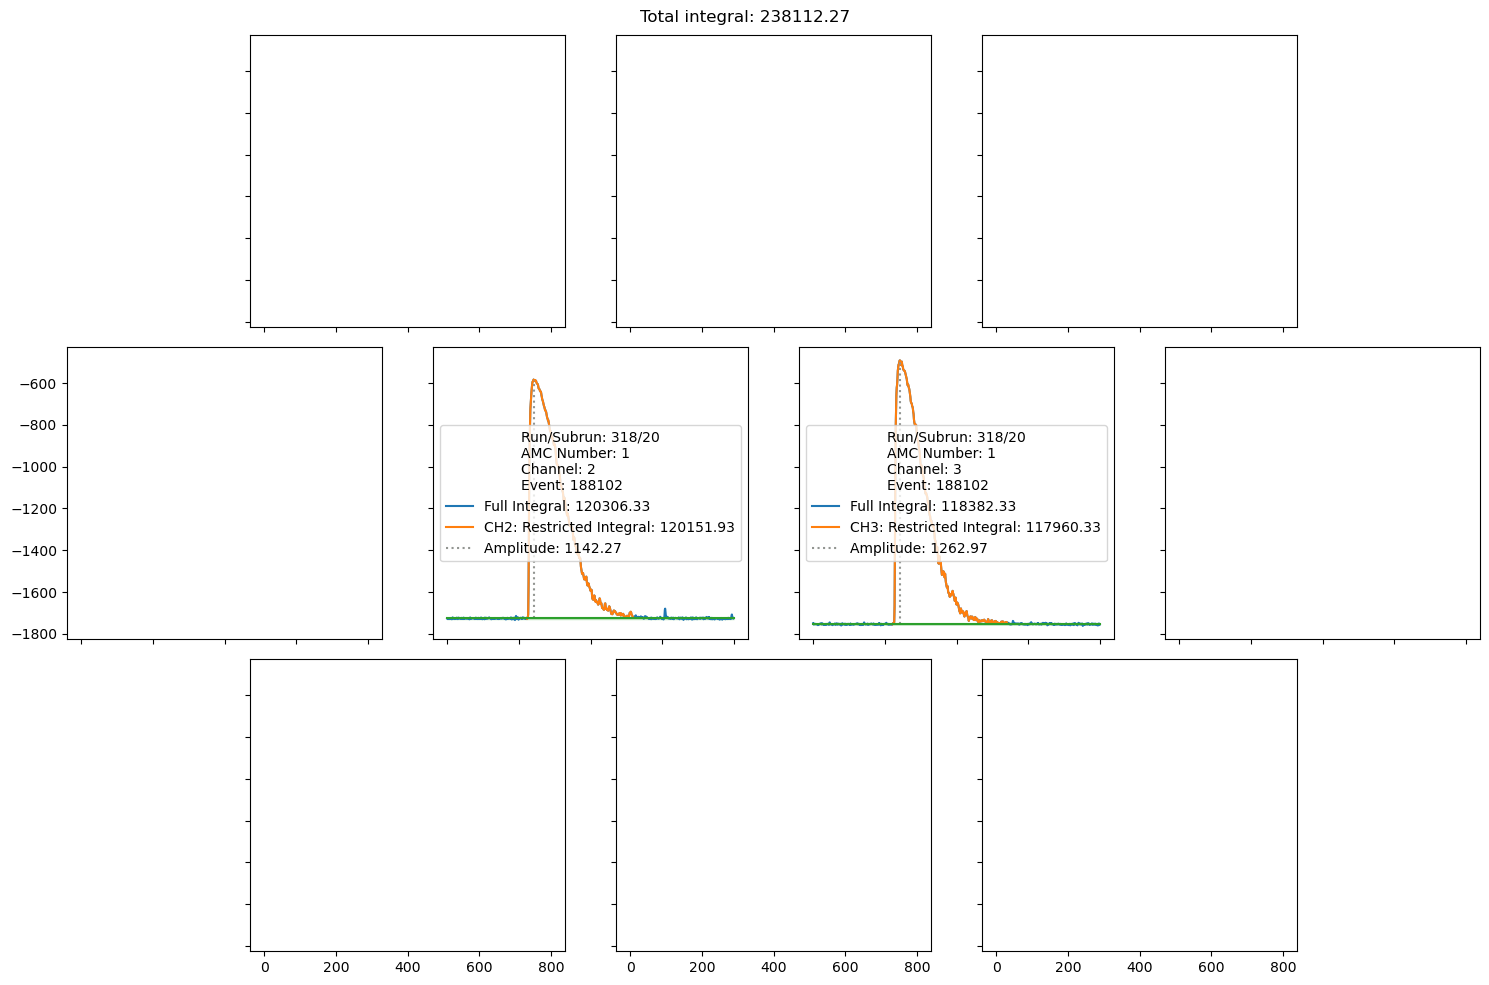

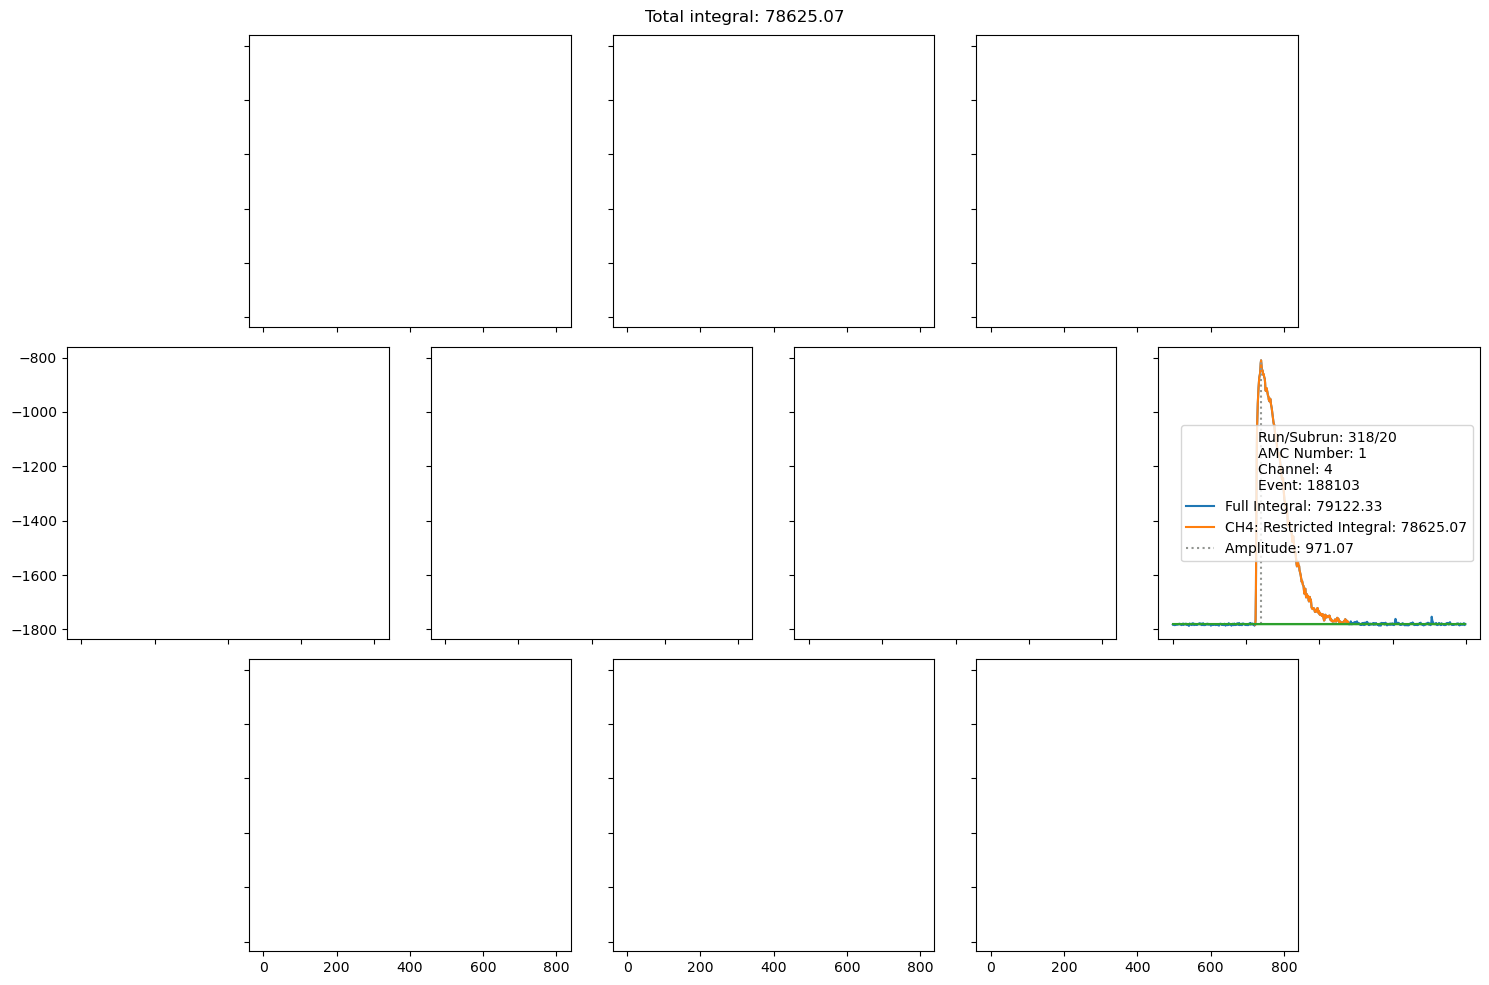

In [9]:
for i, e in enumerate(t):
    if( i > 3):
        break 
    plot_event(e.integrals)
    plt.show()

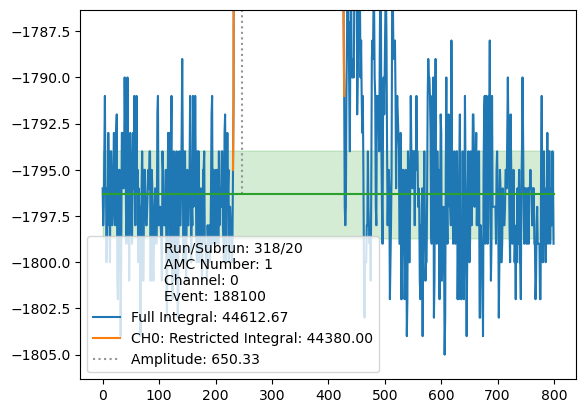

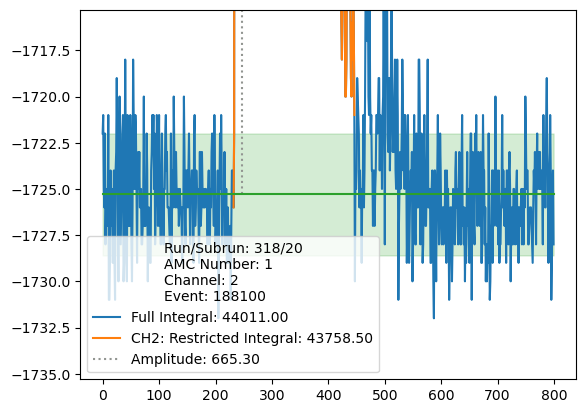

In [10]:
for i, e in enumerate(t):
    if( i > 0):
        break 
    for j, wfj in enumerate(e.integrals):
        plot_integral(wfj)
        plt.ylim(wfj.pedestalLevel - 10, wfj.pedestalLevel + 10)
        plt.show()
        # break

In [ ]:
n = t.Draw("Entry$","integrals.amcNum == 1 && @integrals.size() == 1","colz")
for i in range(n):
    t.GetEntry(t.GetV1()[i])

In [17]:
c = r.TCanvas()
t.Draw("integrals.channelTag","integrals.amcNum == 1 && @integrals.size() == 1","colz")
# c.SetLogy()
c.Draw()

In [22]:
c = r.TCanvas()
t.Draw("integrals.amplitude","integrals.amcNum == 1 && integrals.channelTag == 0","colz")
c.SetLogy()
c.Draw()

: 

In [11]:
t.Draw("integrals_calibrated ","","")
c.Draw()

NameError: name 'c' is not defined

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TSelectorDraw::ProcessFillObject>: Not implemented for vector<dataProducts::CalibratedIntegral>


In [13]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integral","integrals_calibrated.amcNum == 1","colz")
t.Draw("integrals_calibrated.integral","integrals_calibrated.amcNum == 1 && @integrals_calibrated.size() == 1 ","same")
c.SetLogy()
c.Draw()

In [6]:
c = r.TCanvas()
t.Draw("integrals.integral:integrals.channelTag","amcNum == 1 && integrals.integral > 10000","colz")
# c.SetLogy()
c.Draw()

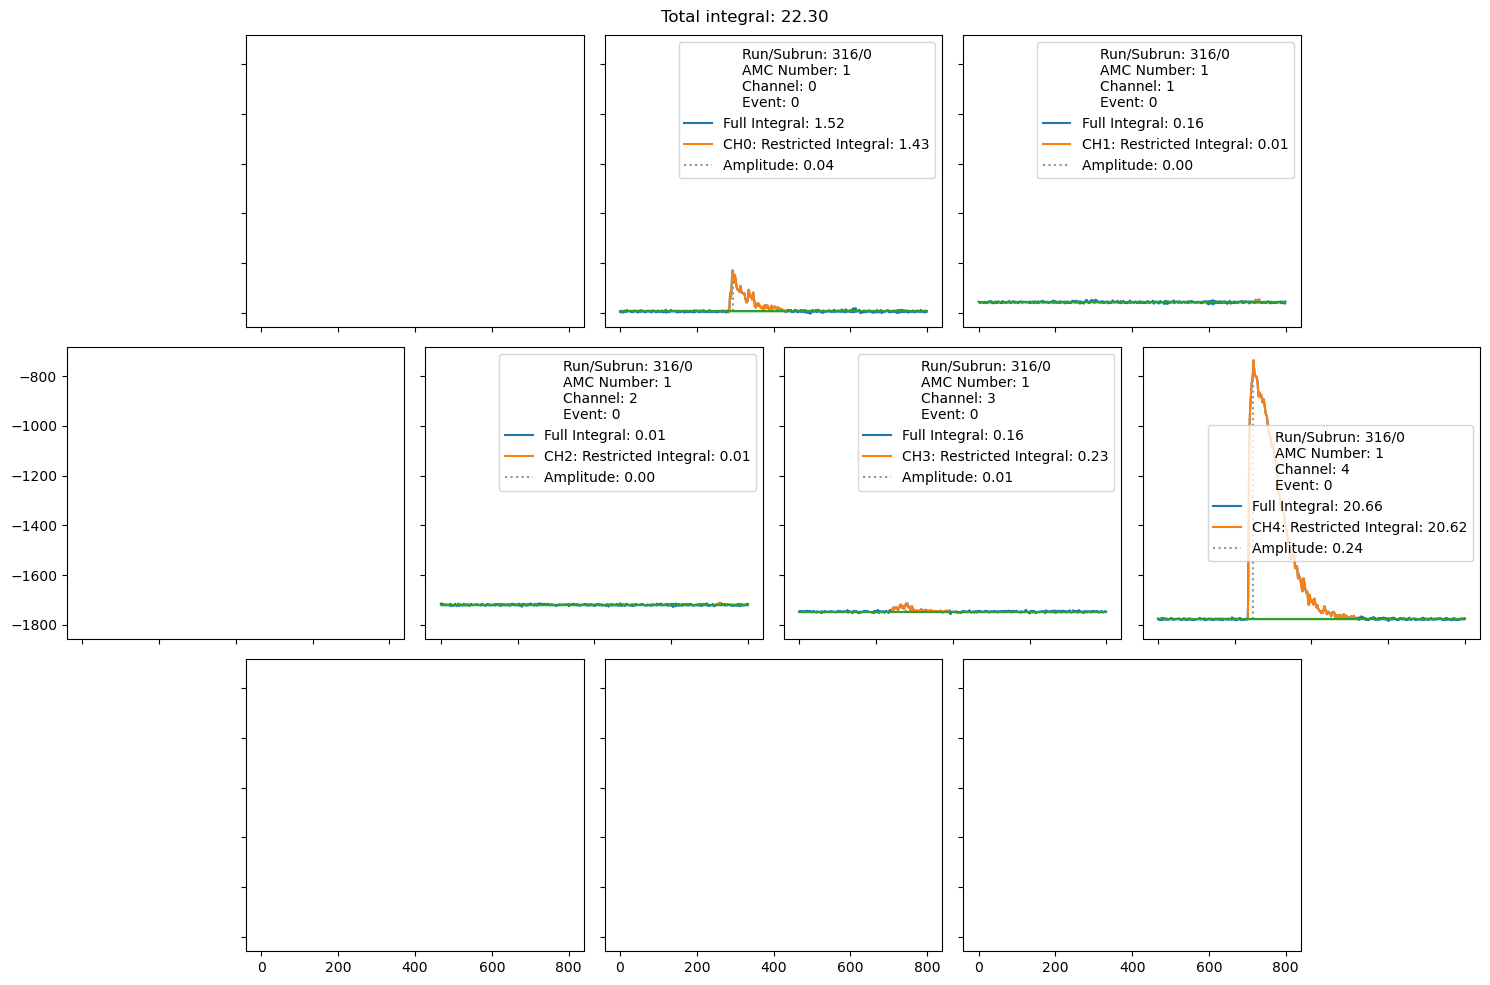

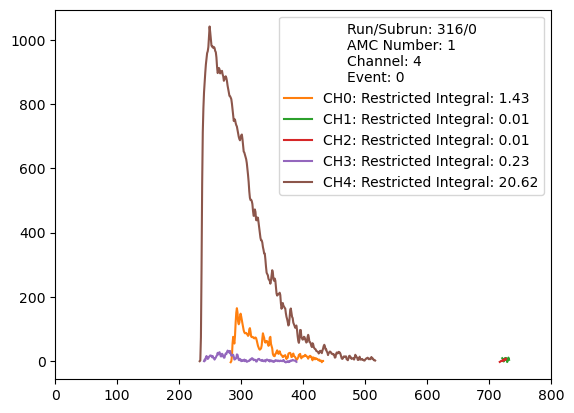

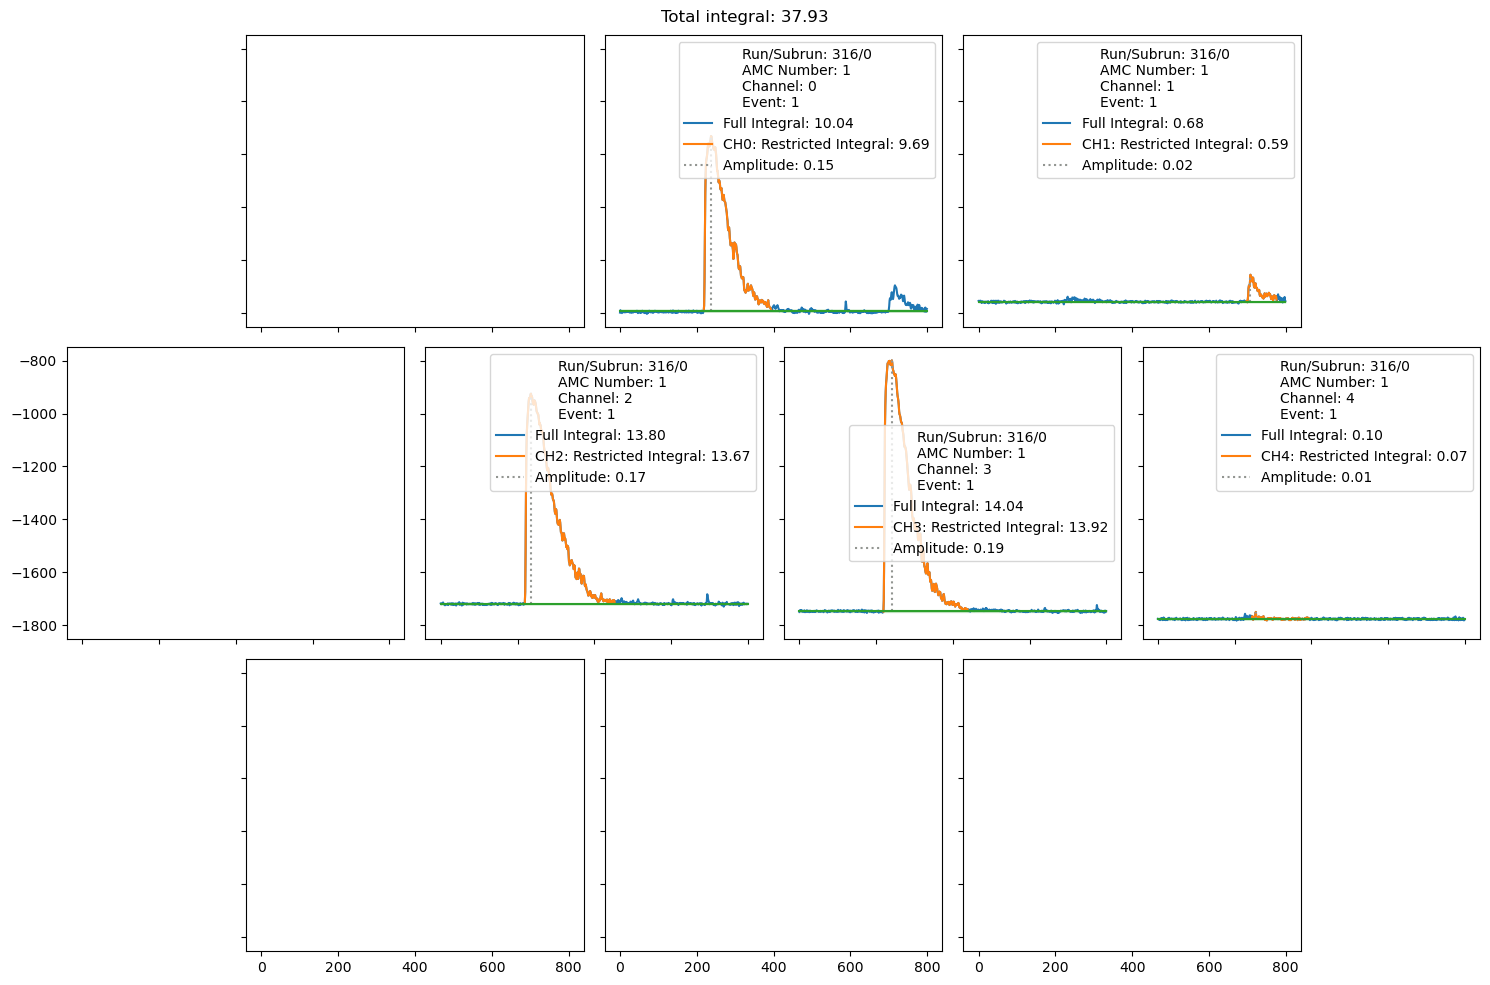

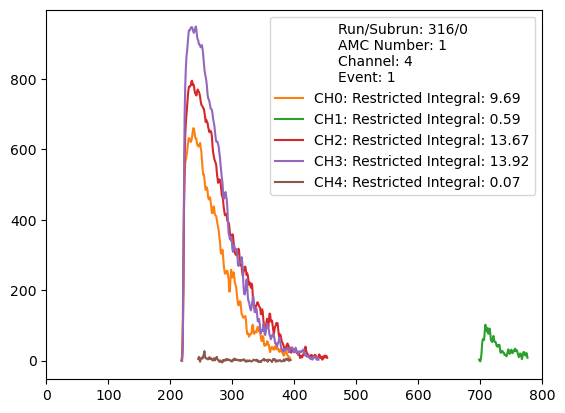

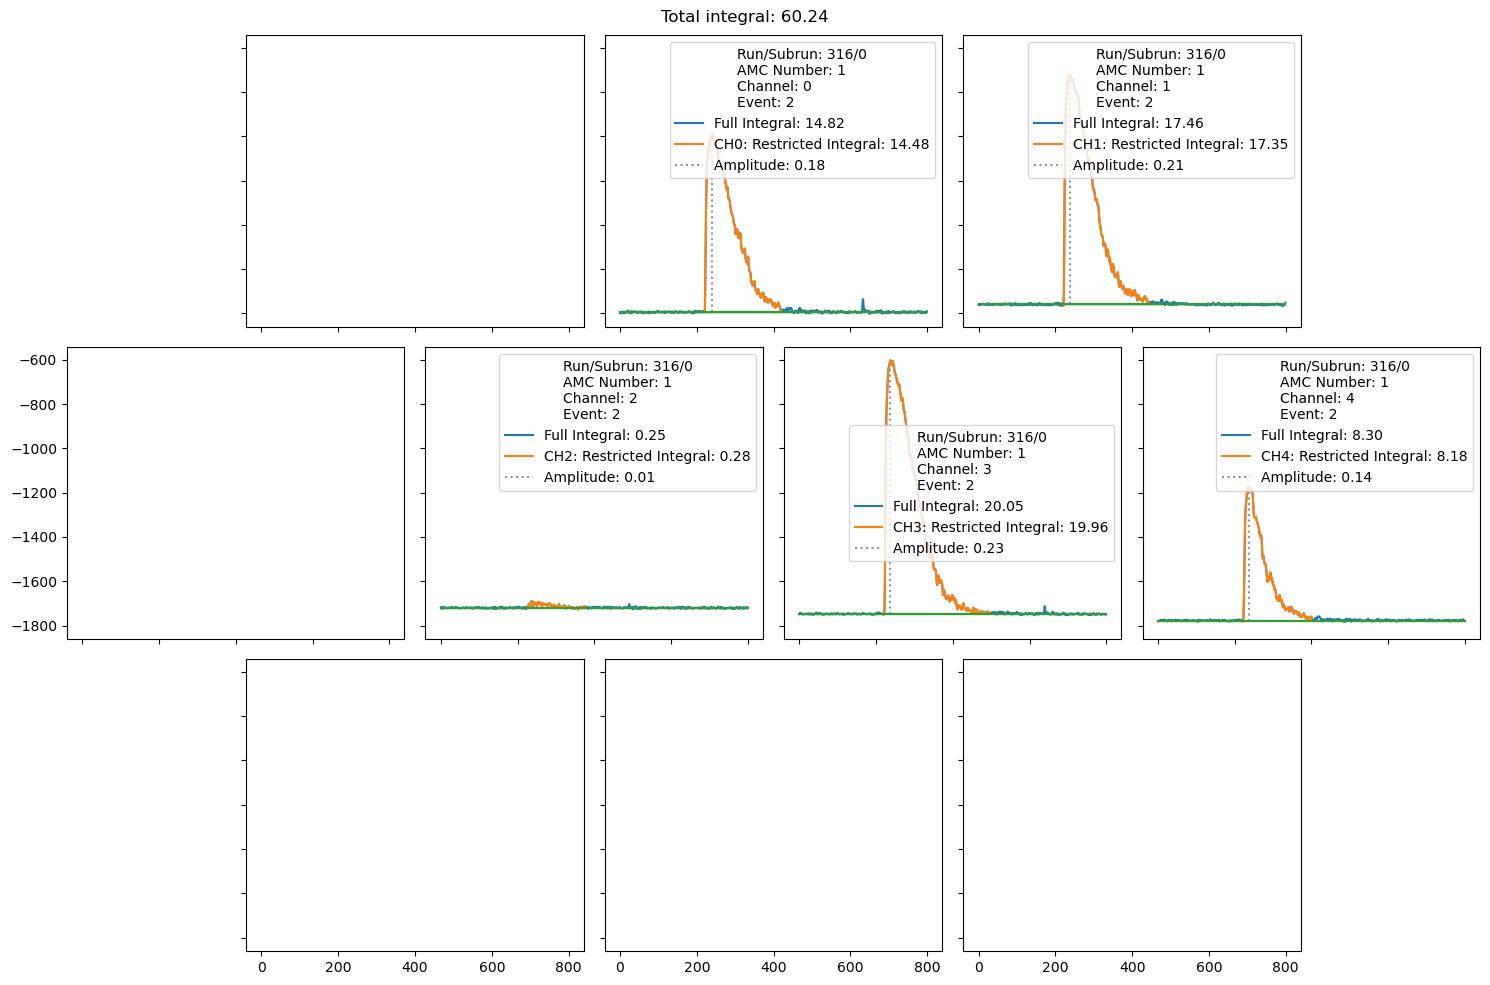

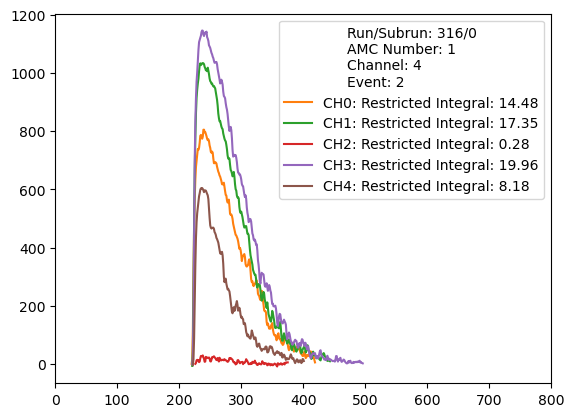

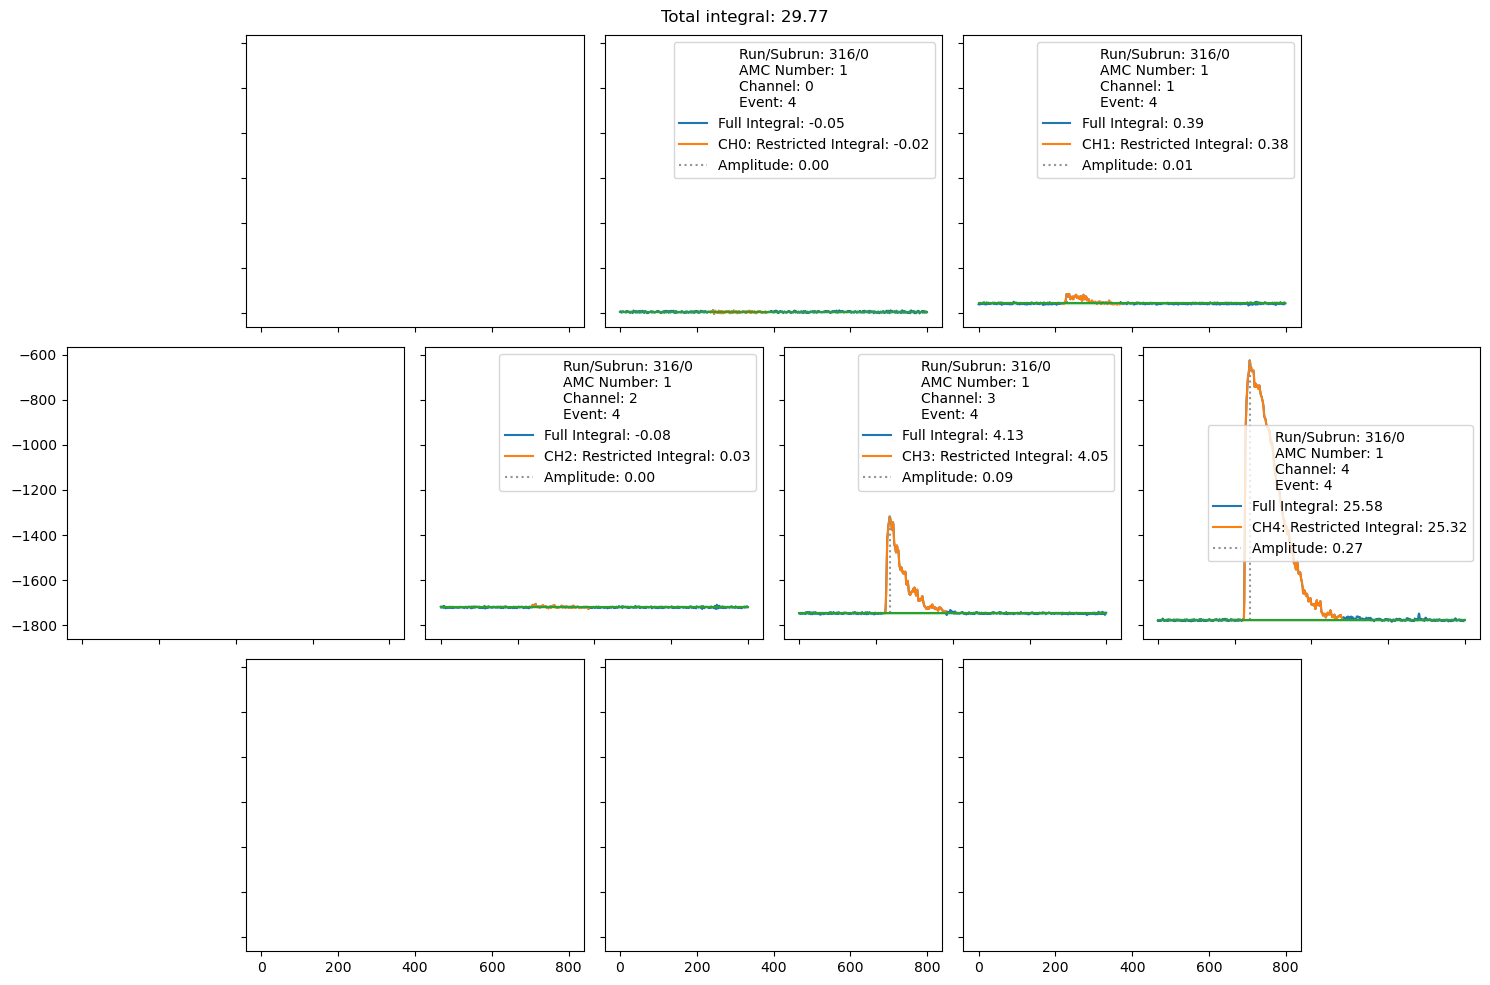

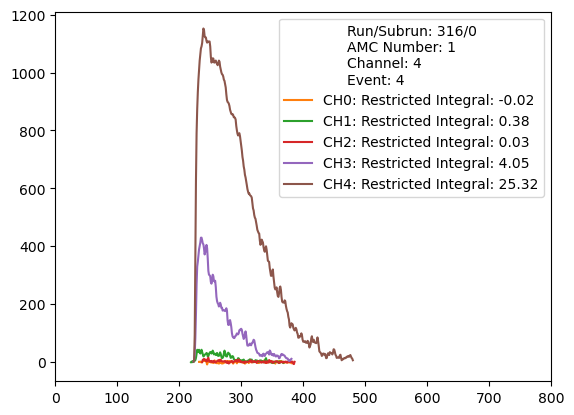

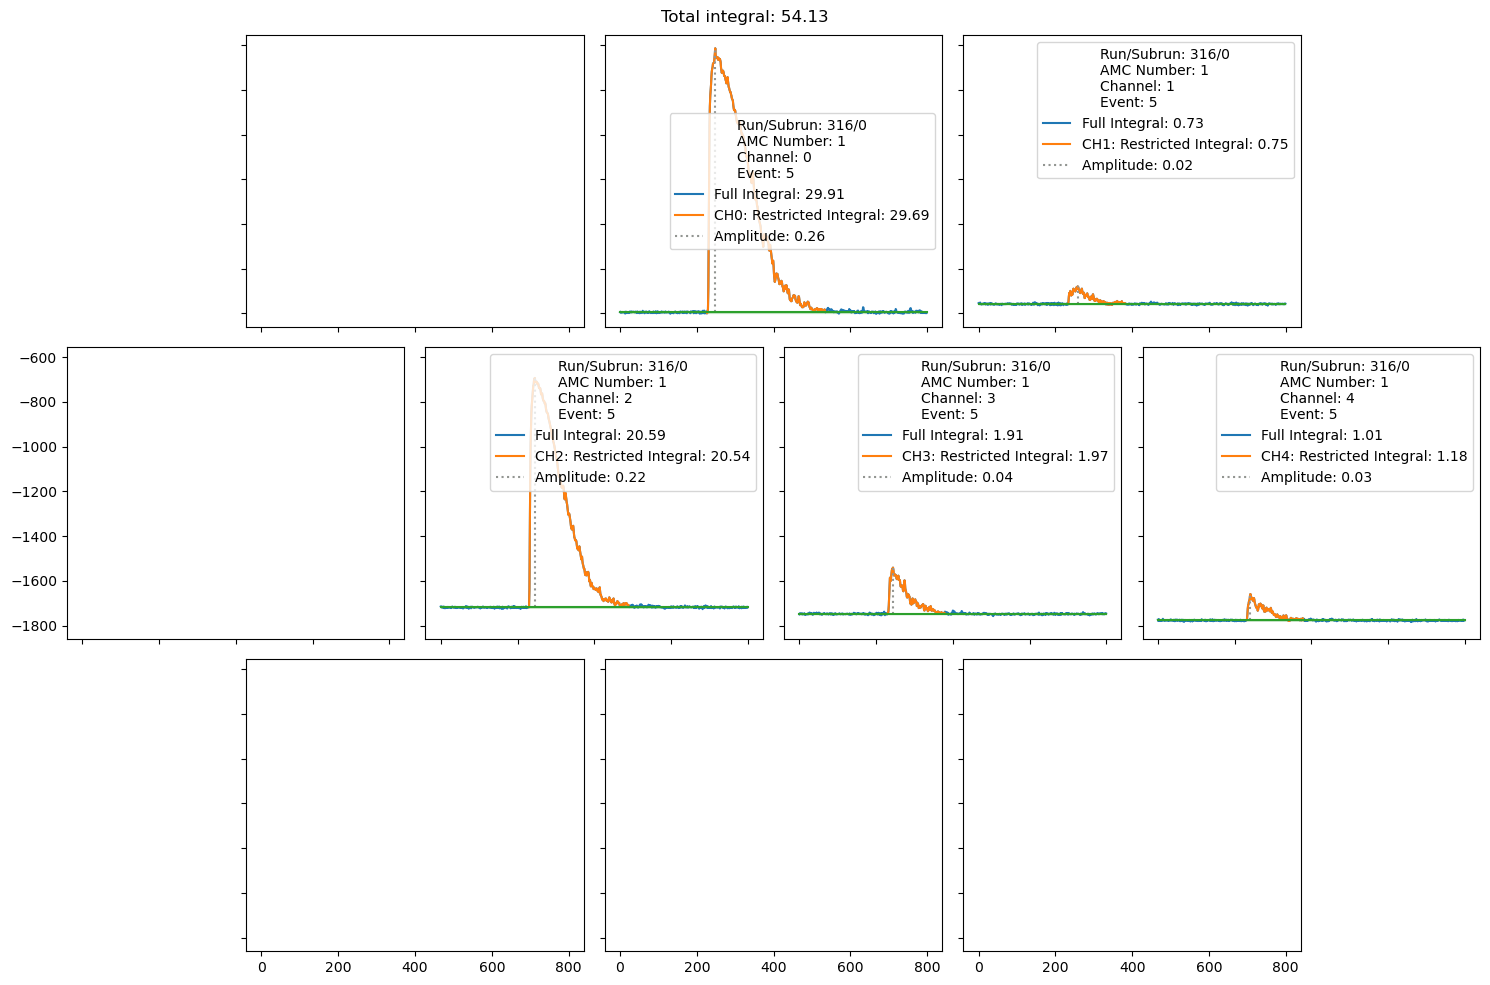

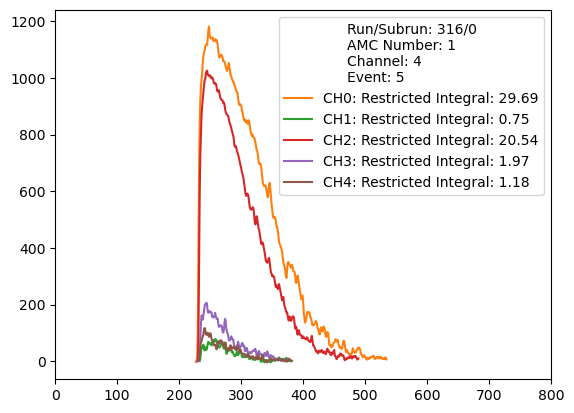

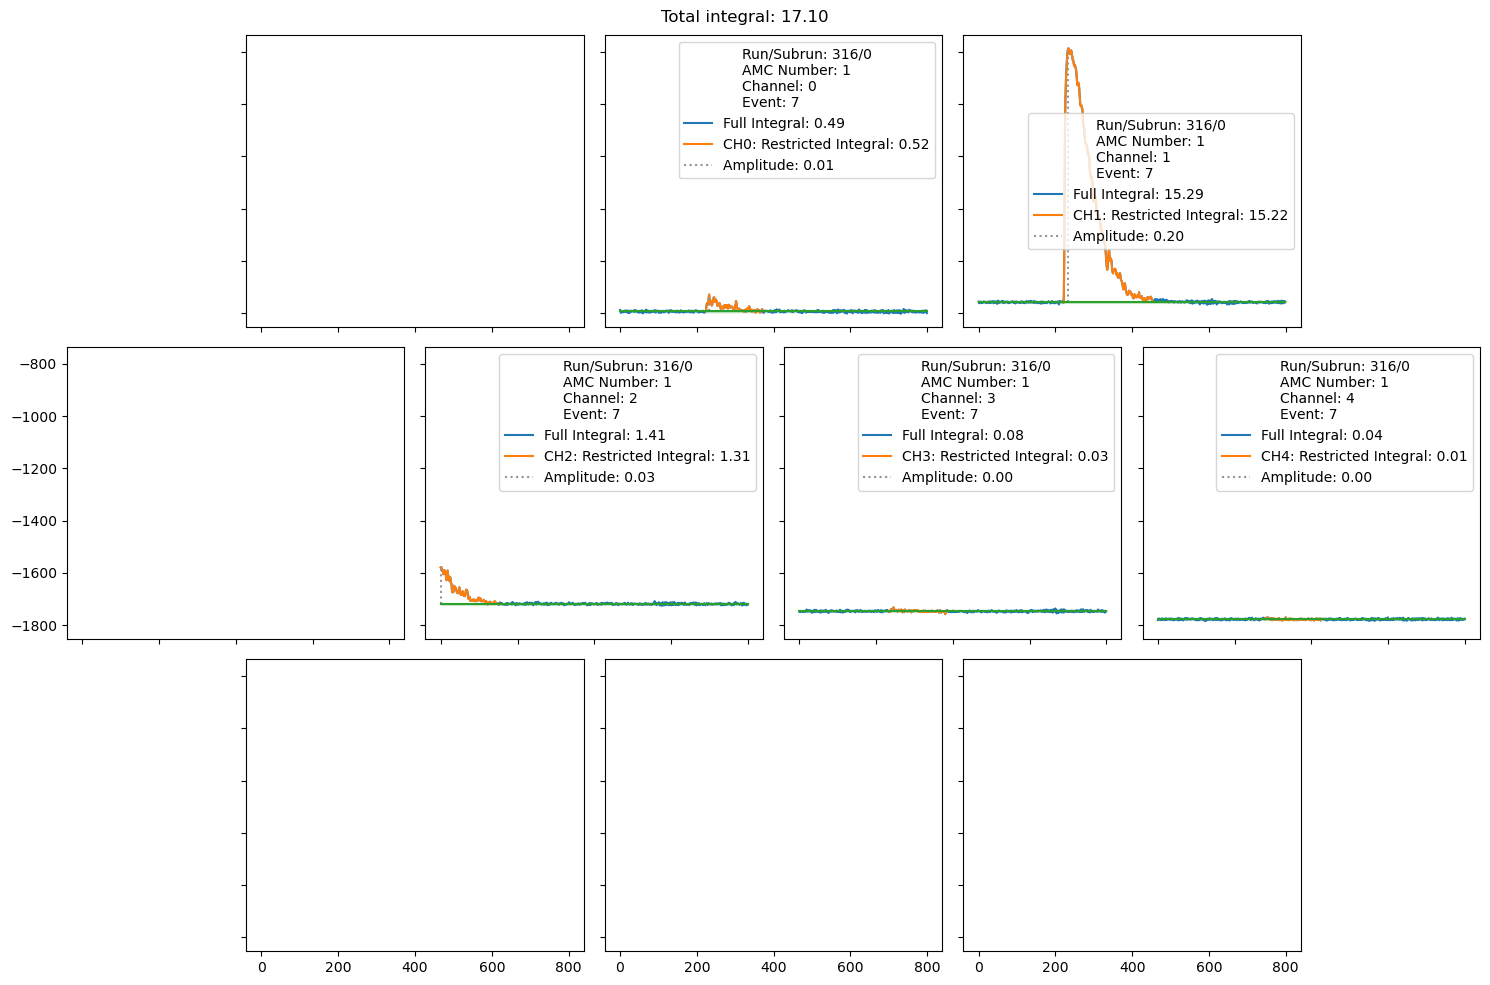

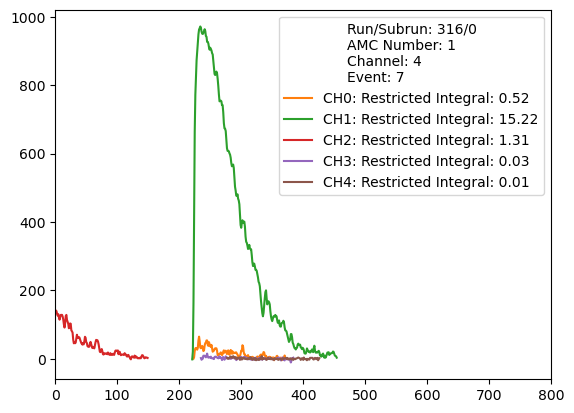

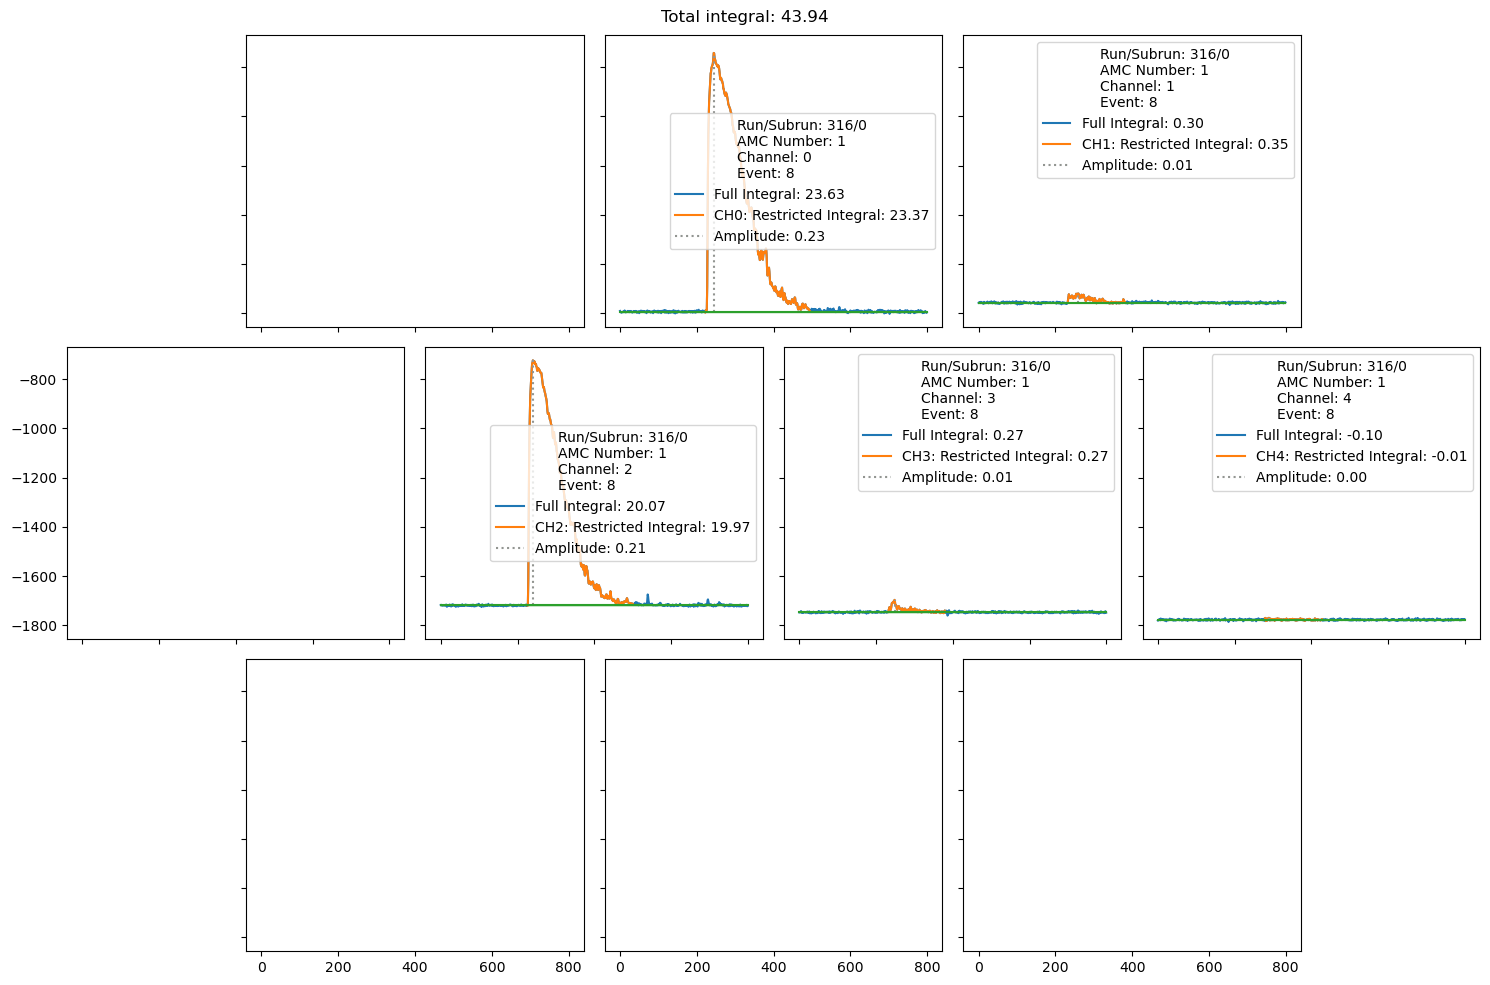

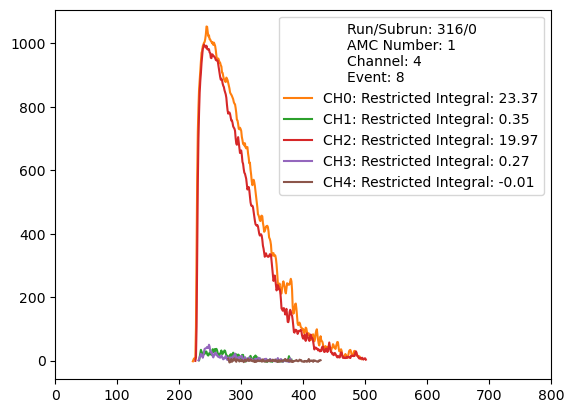

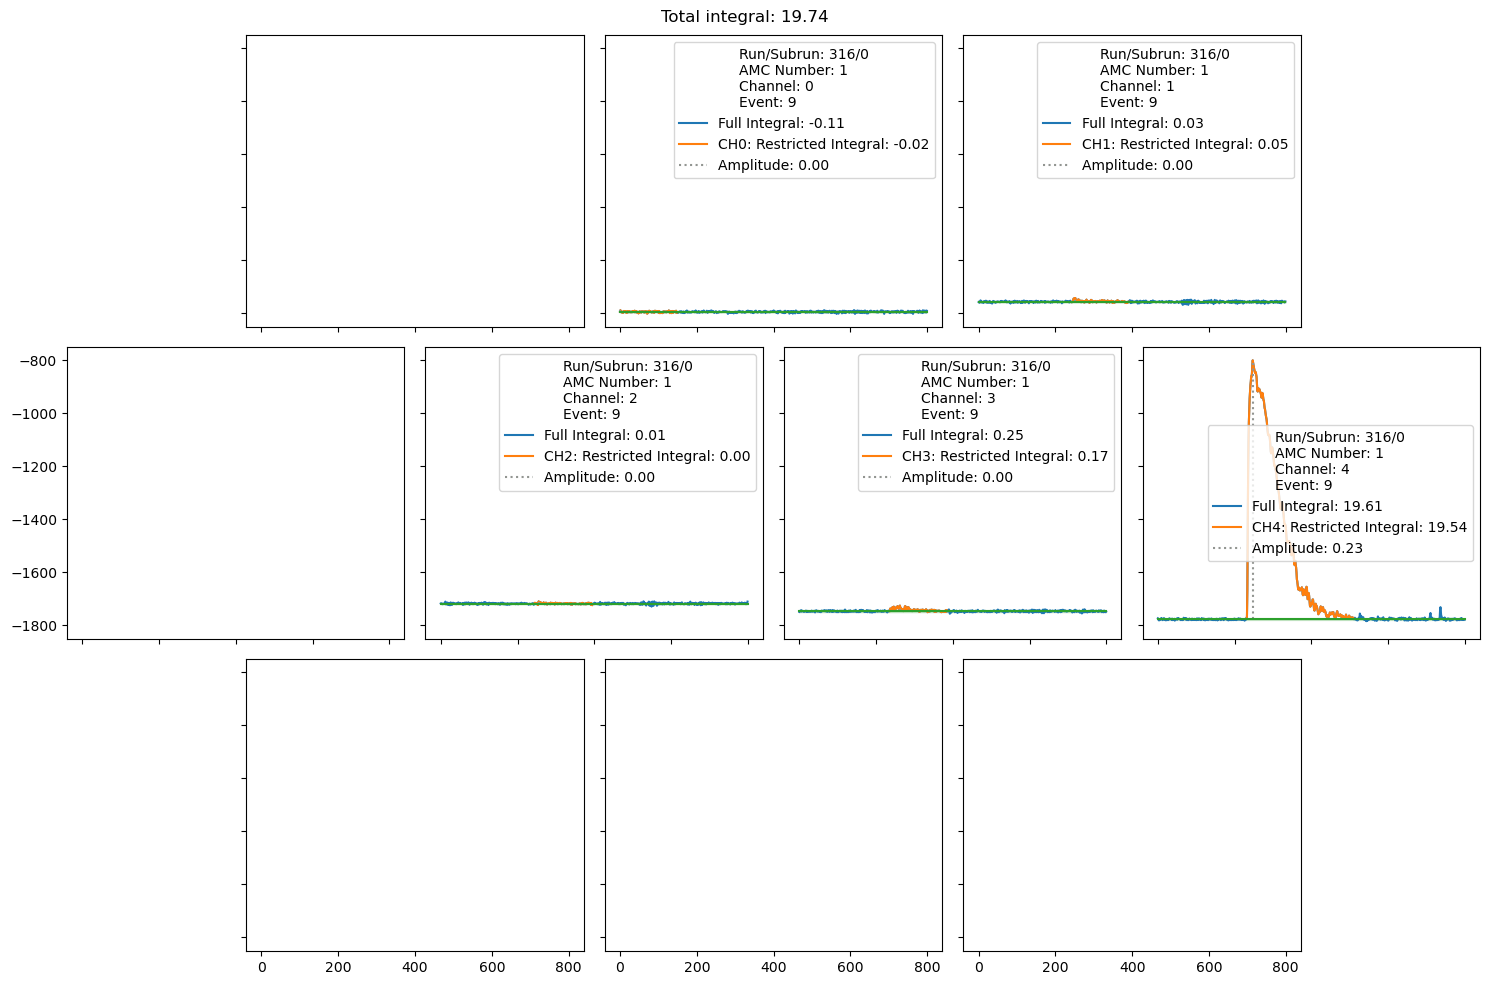

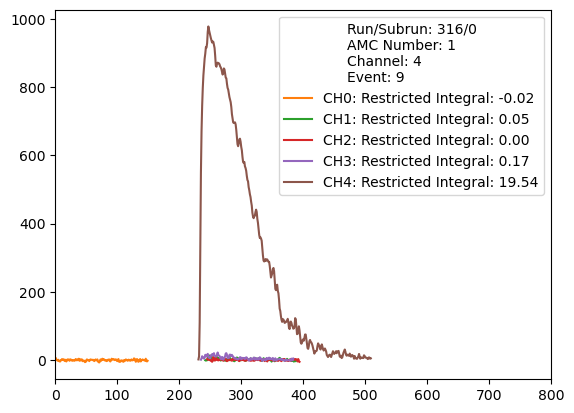

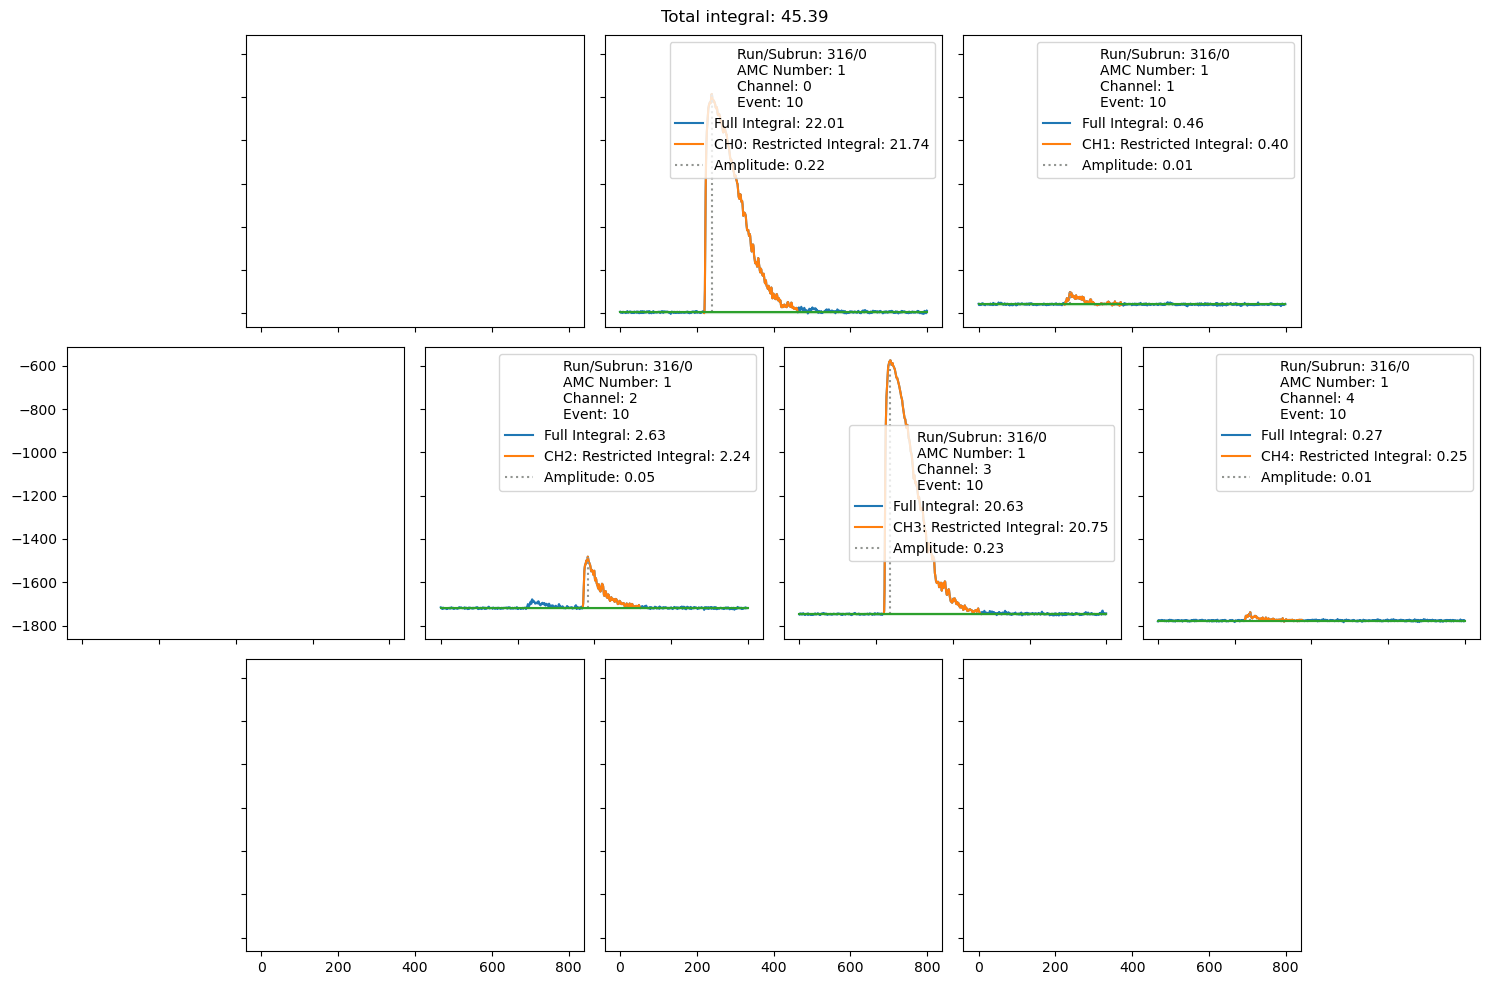

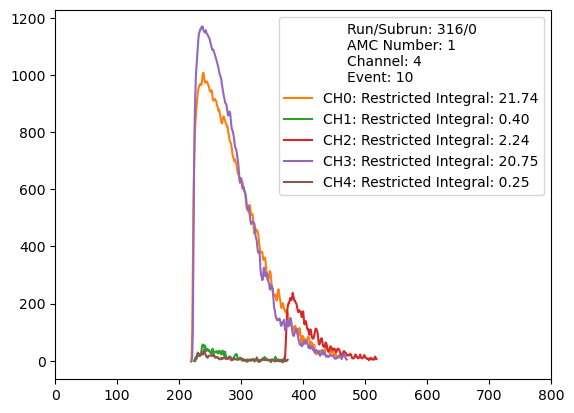

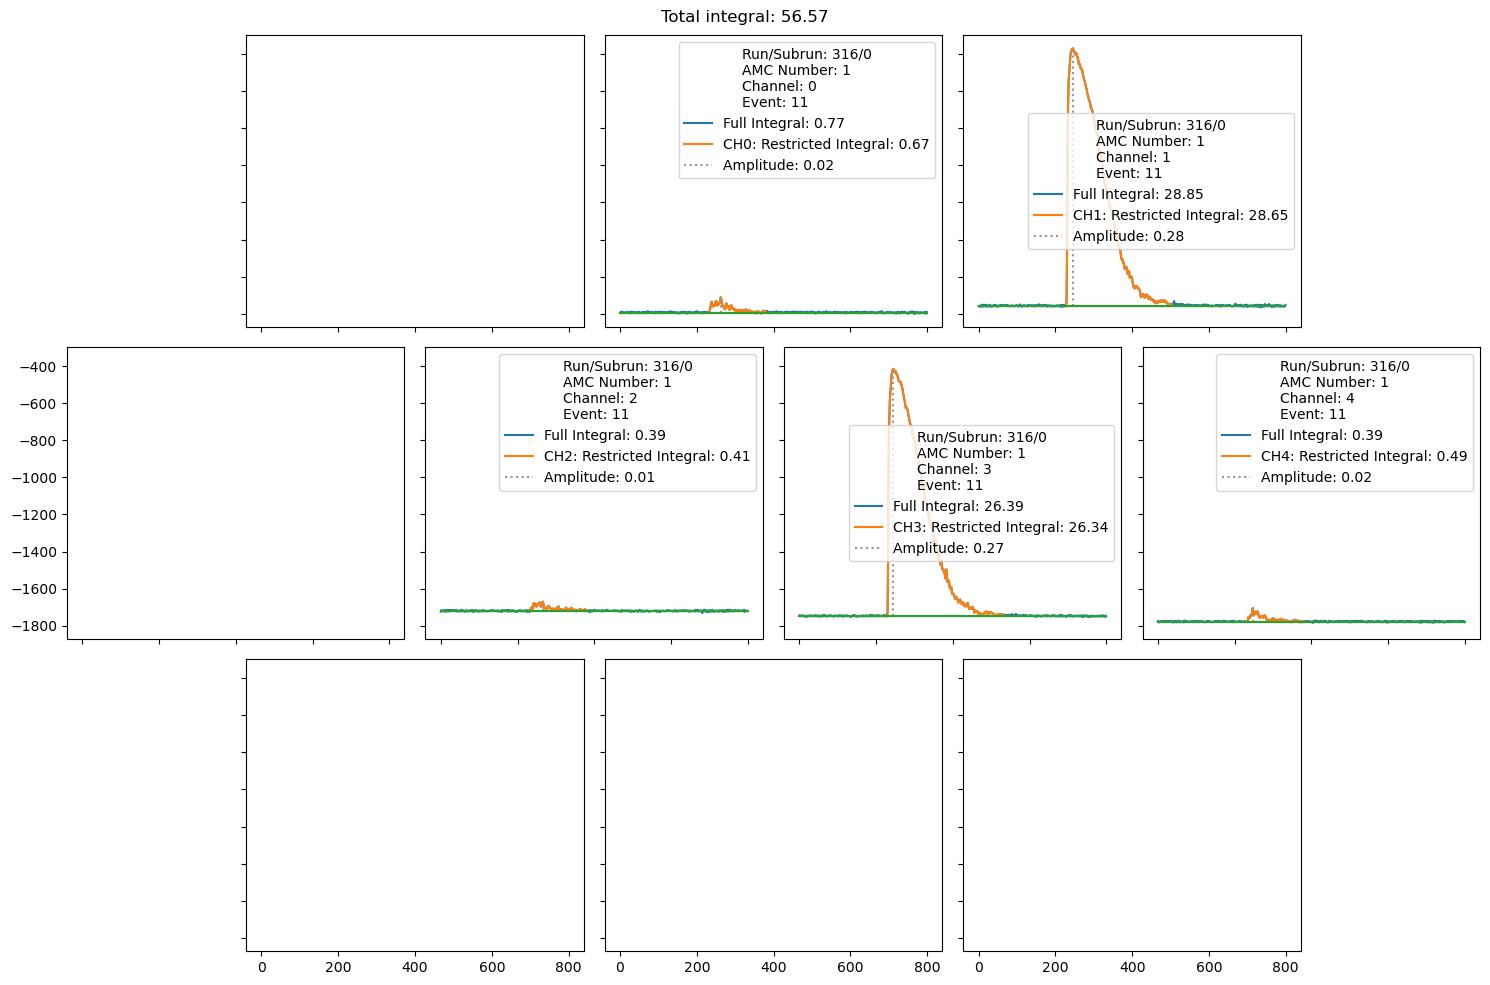

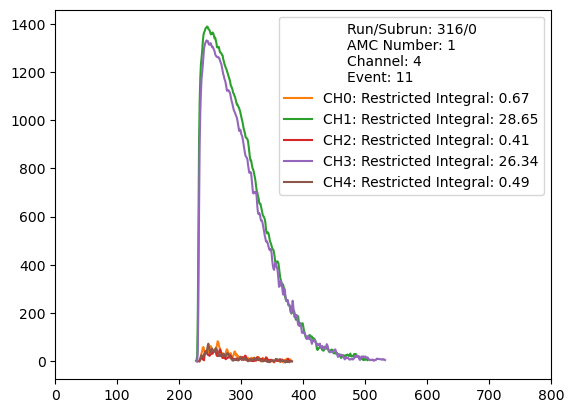

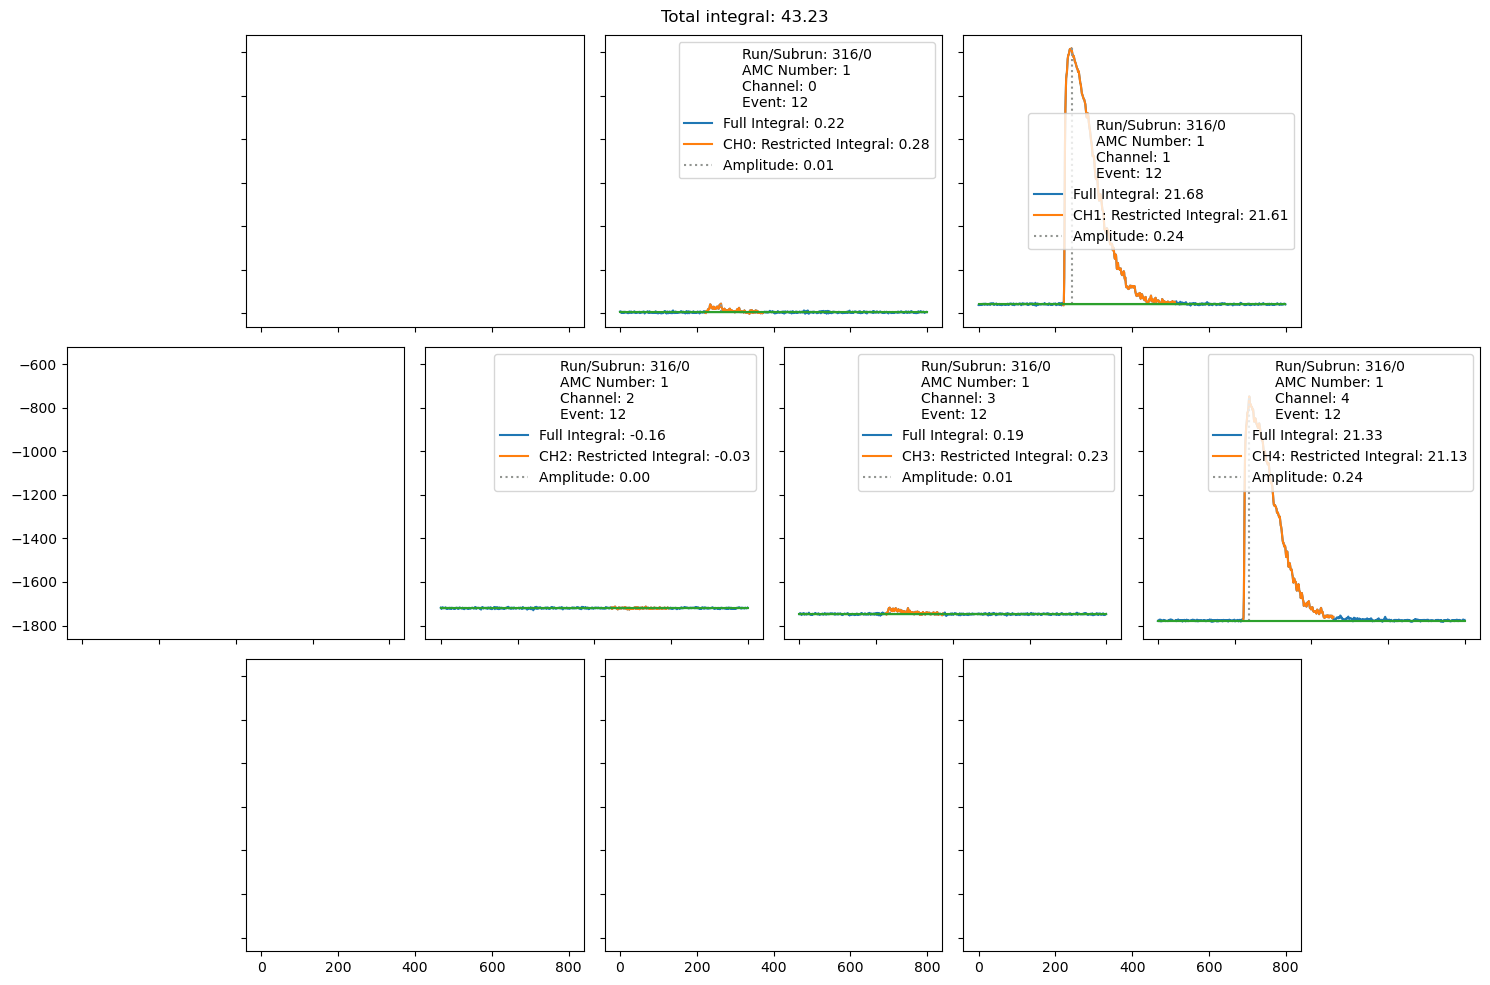

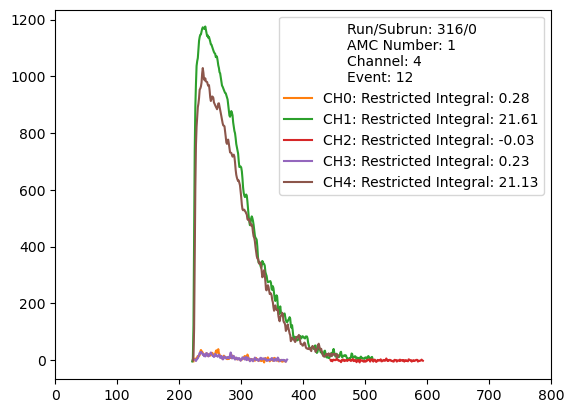

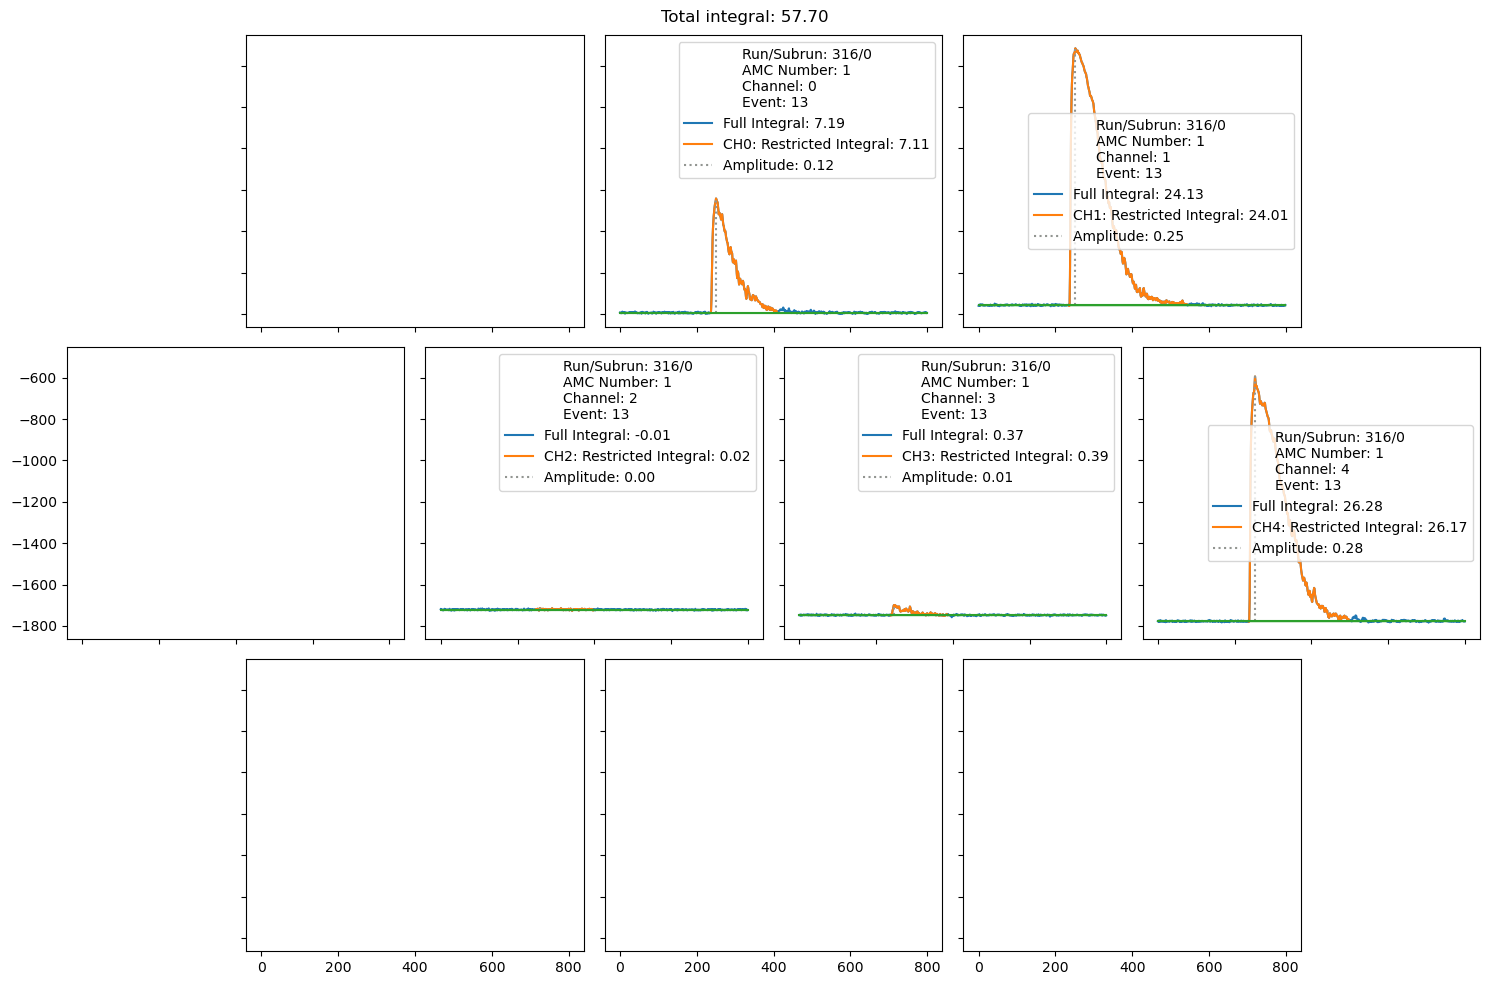

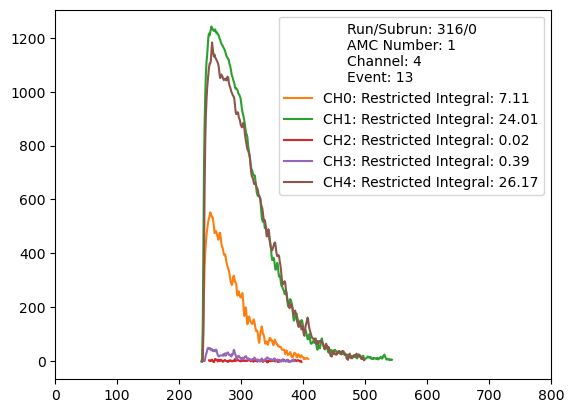

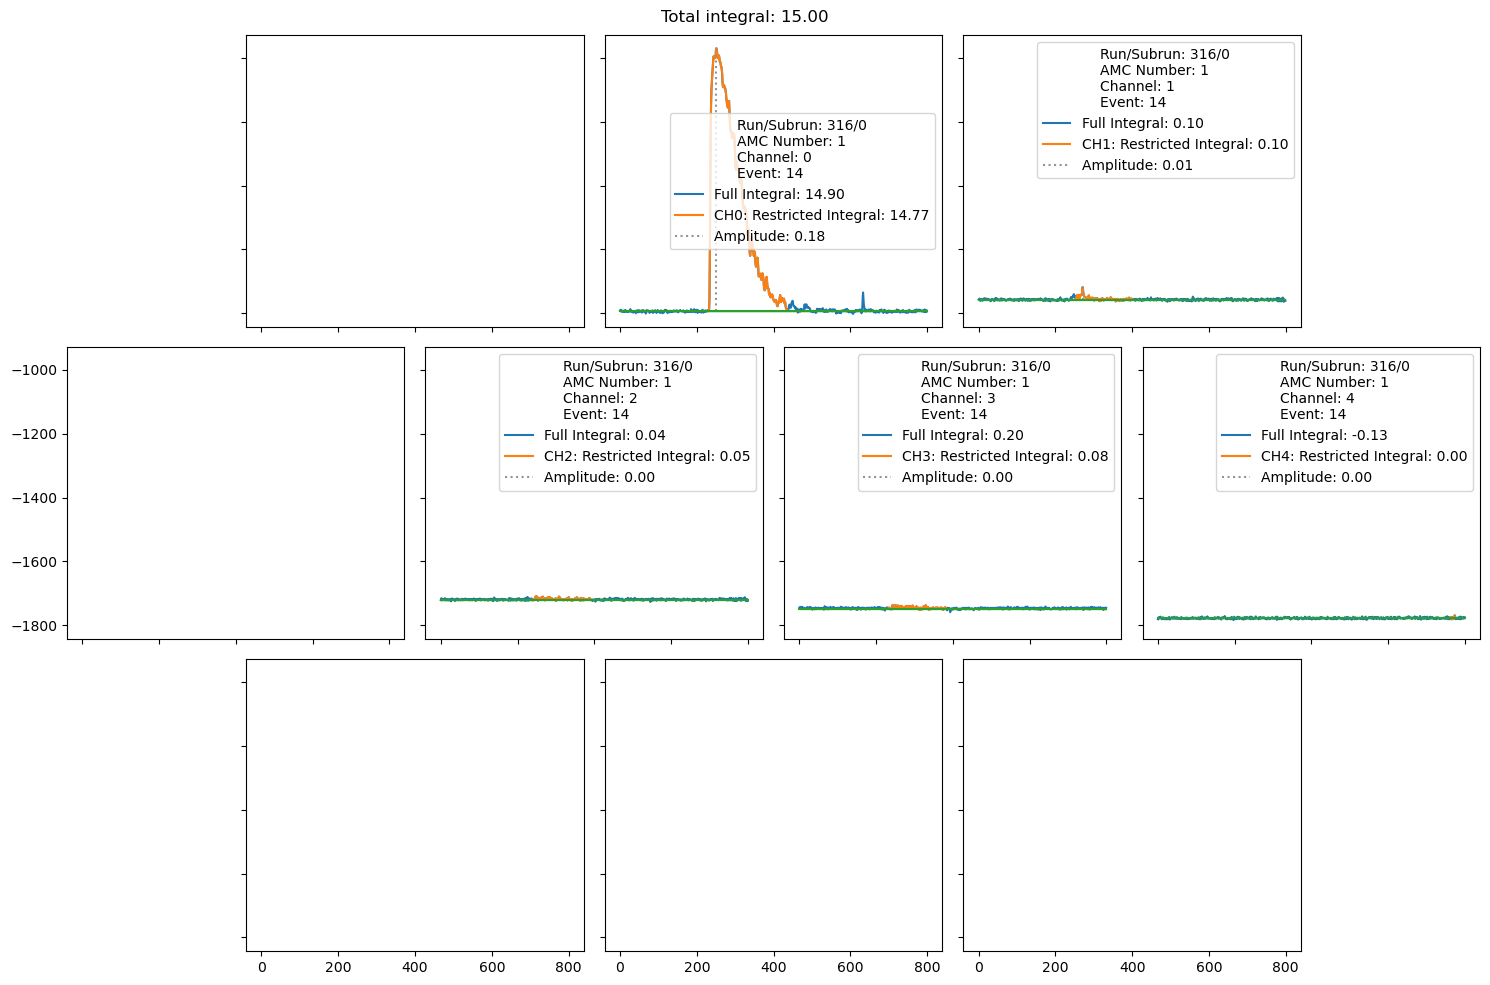

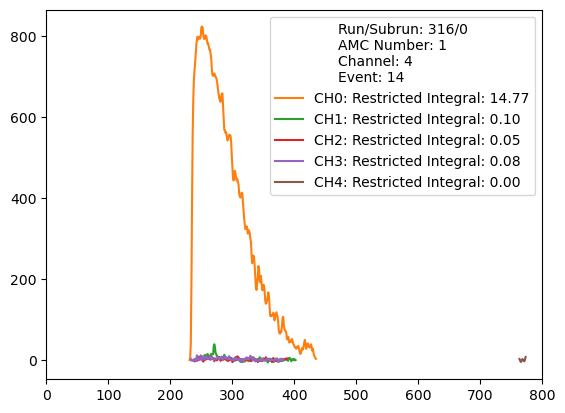

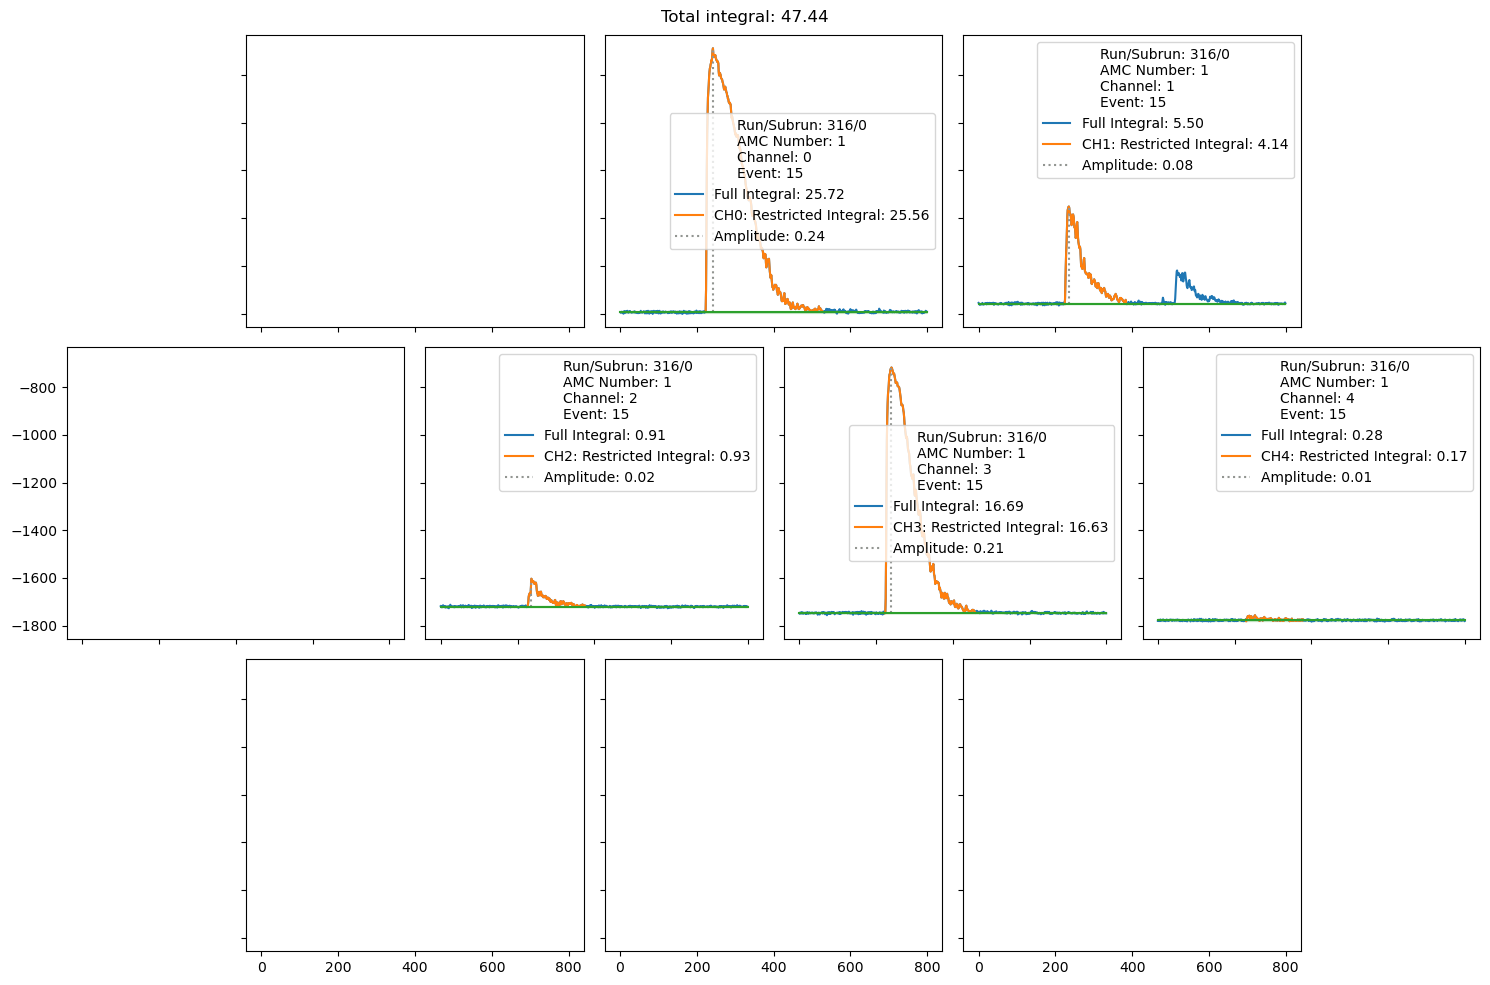

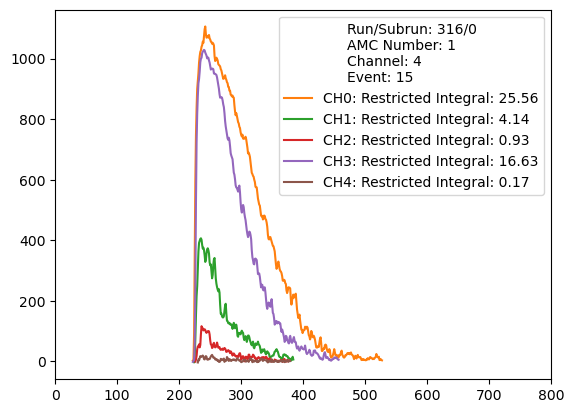

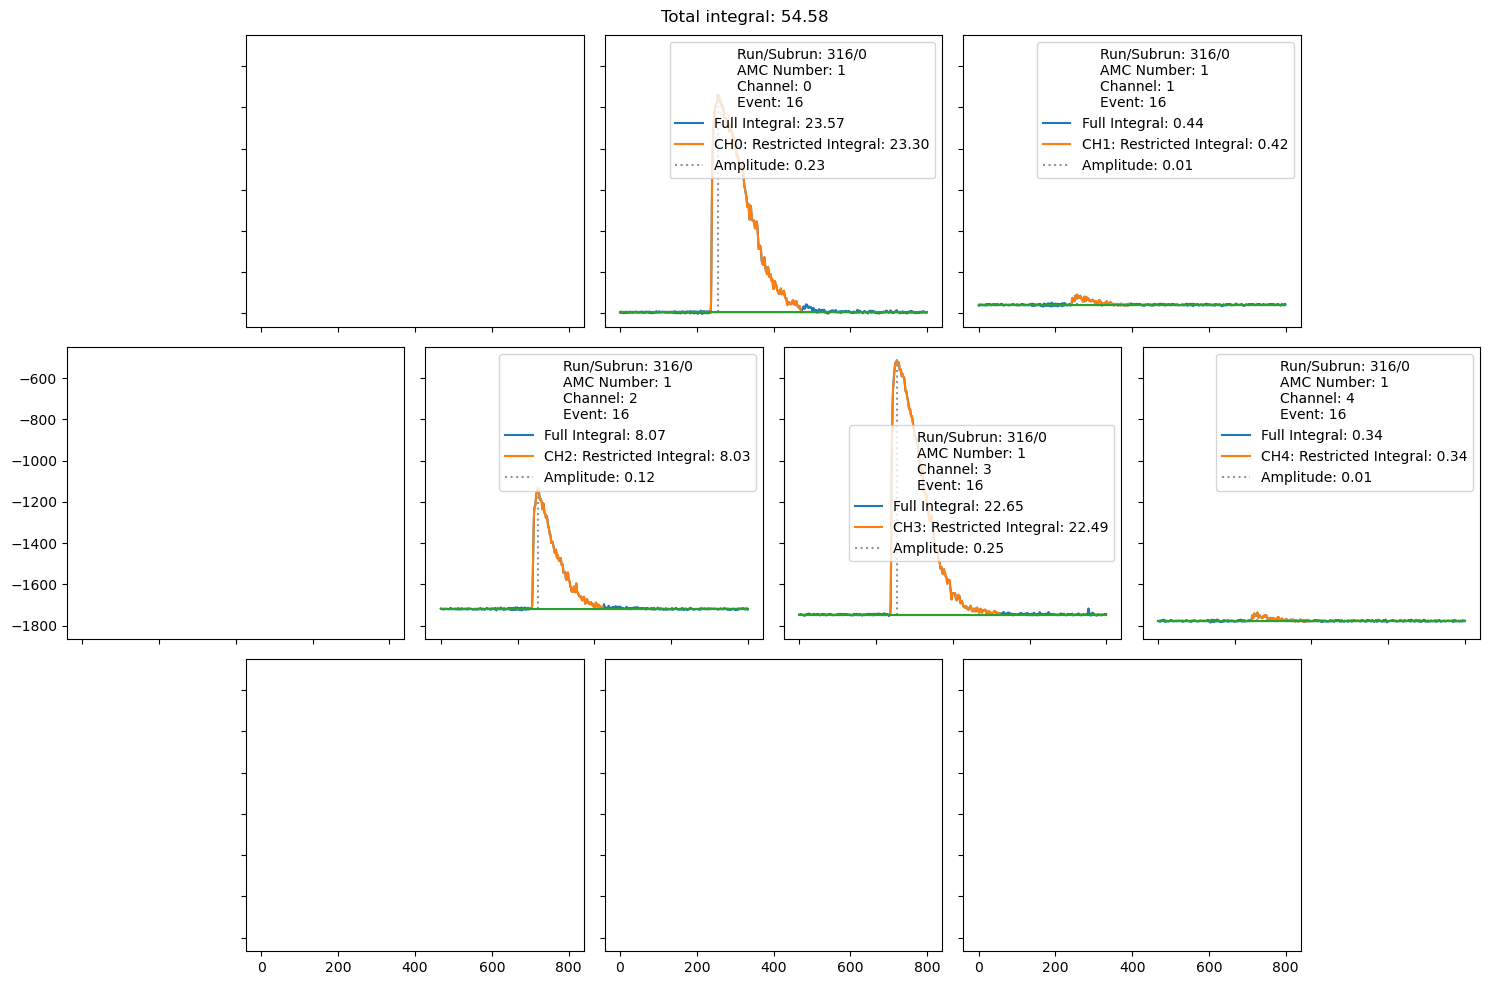

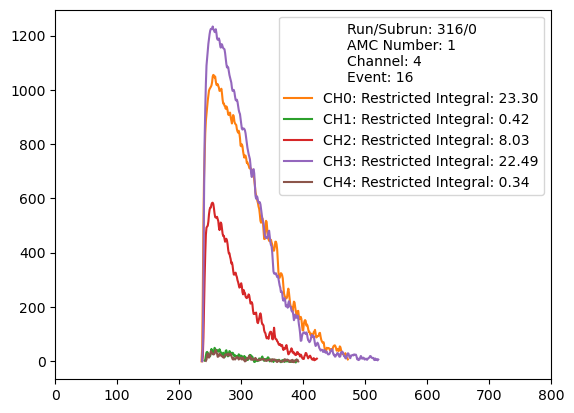

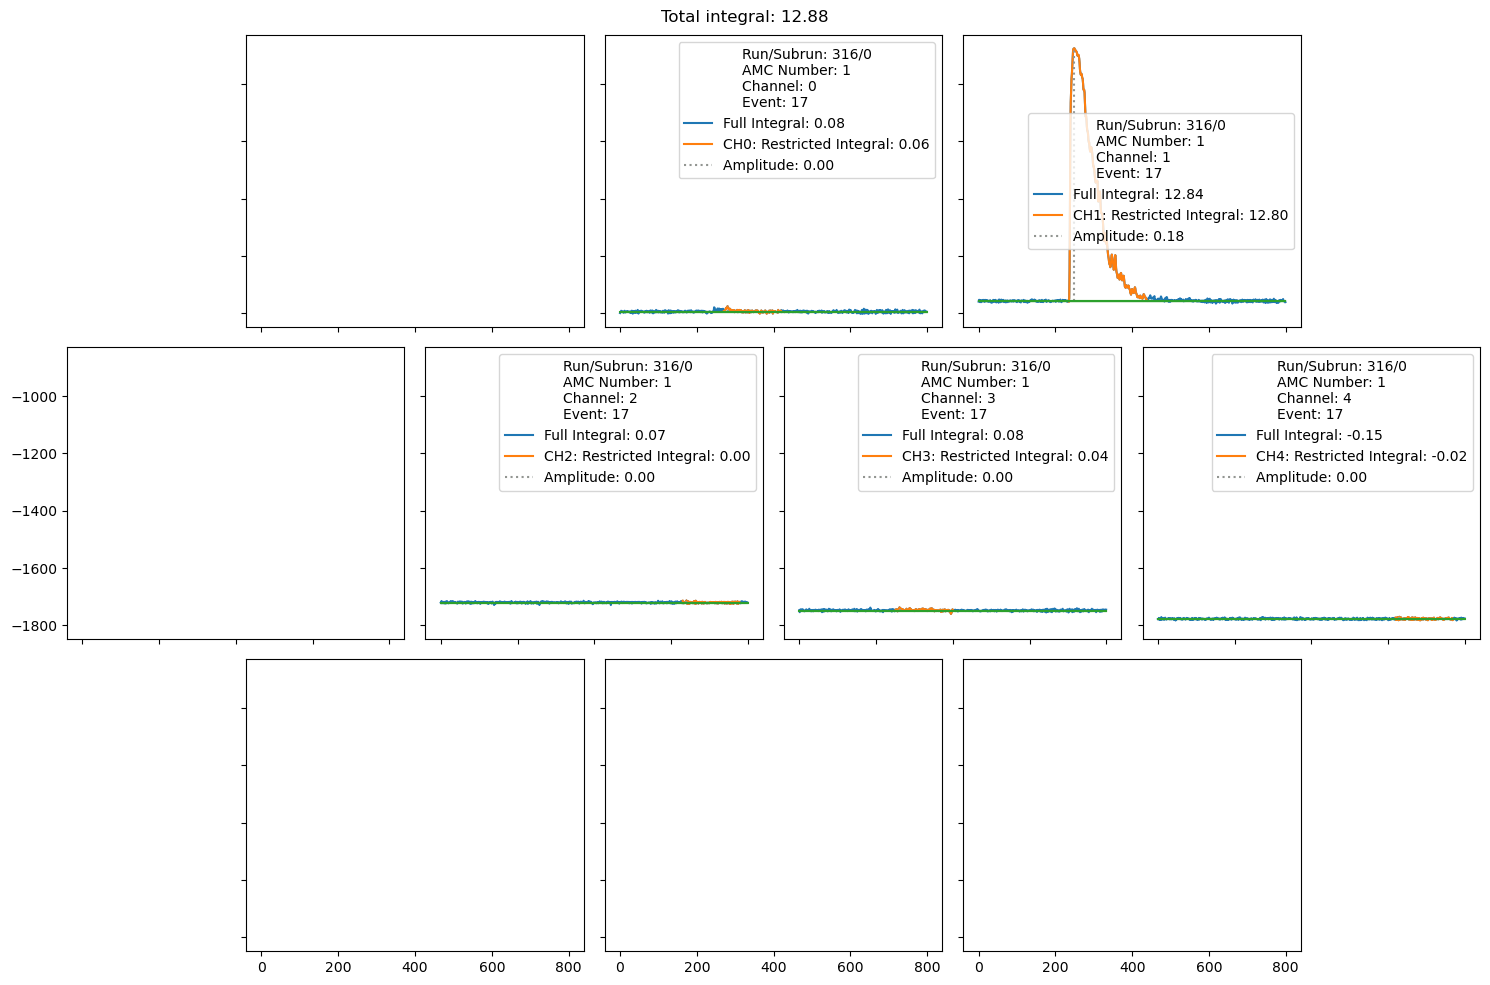

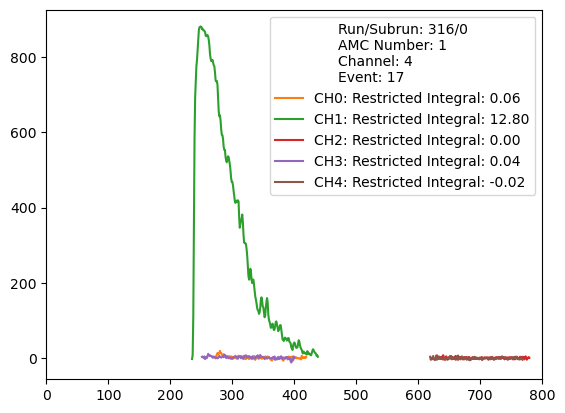

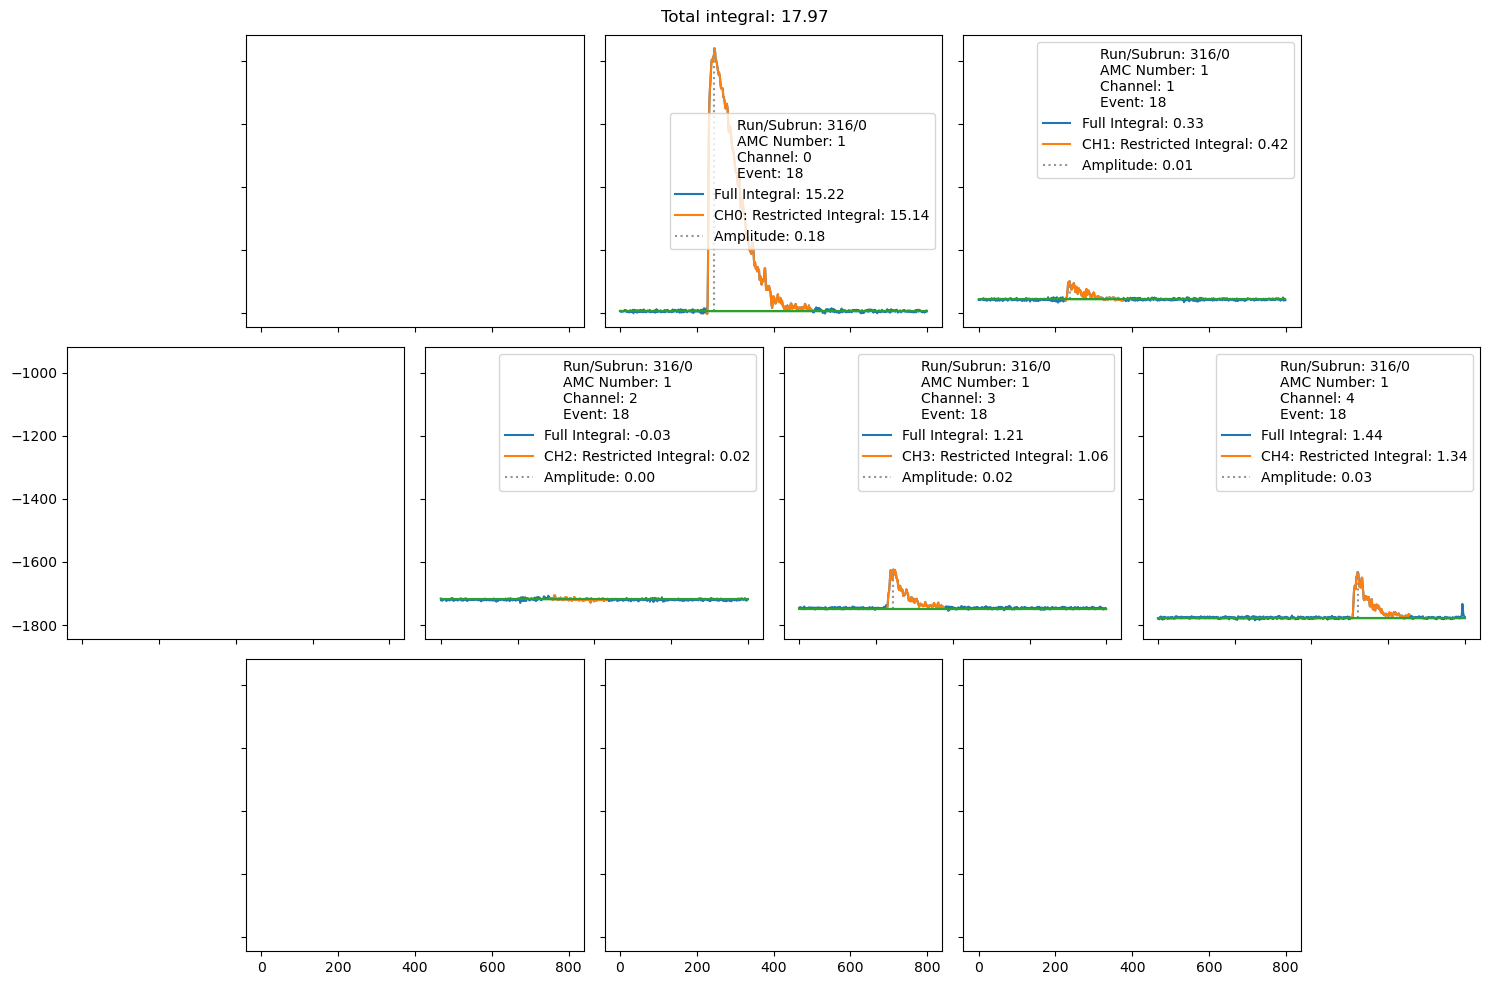

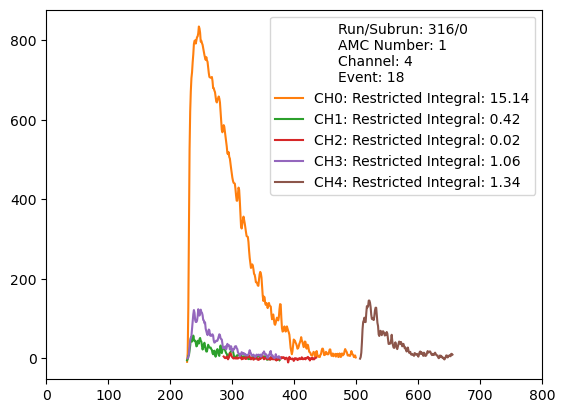

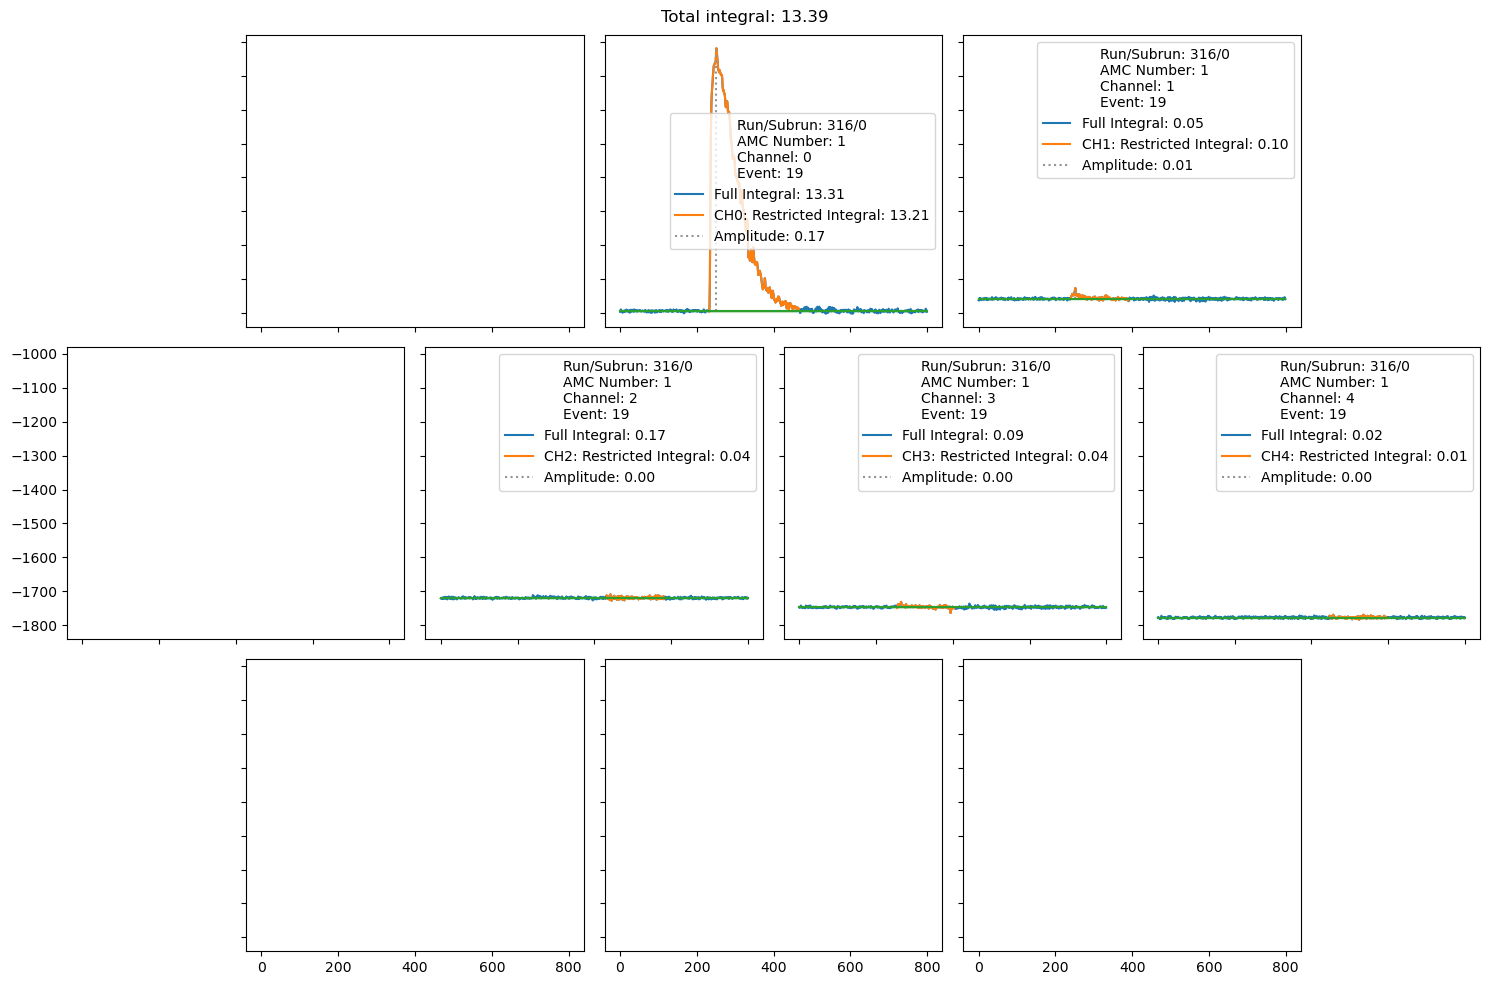

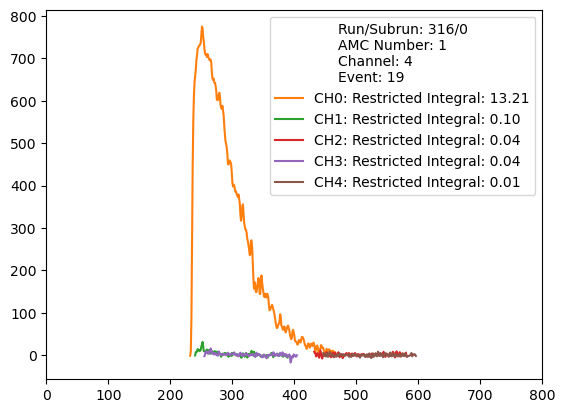

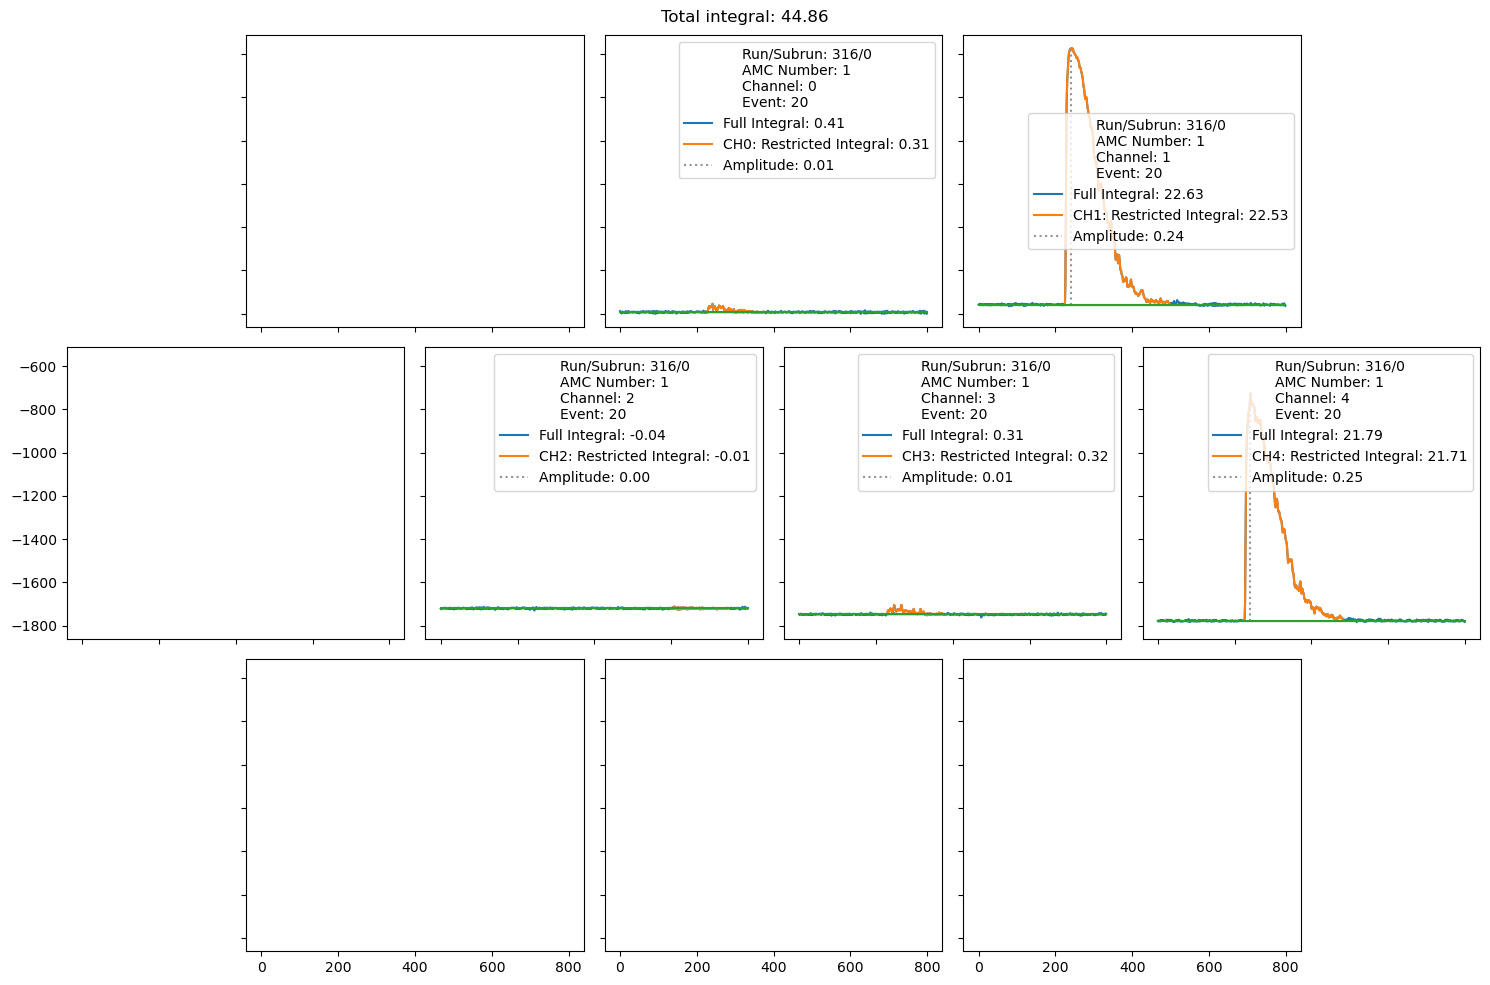

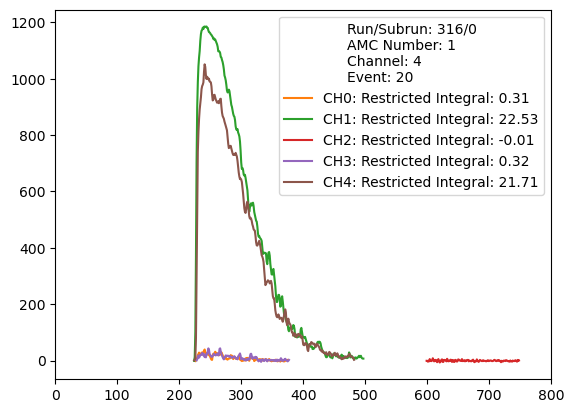

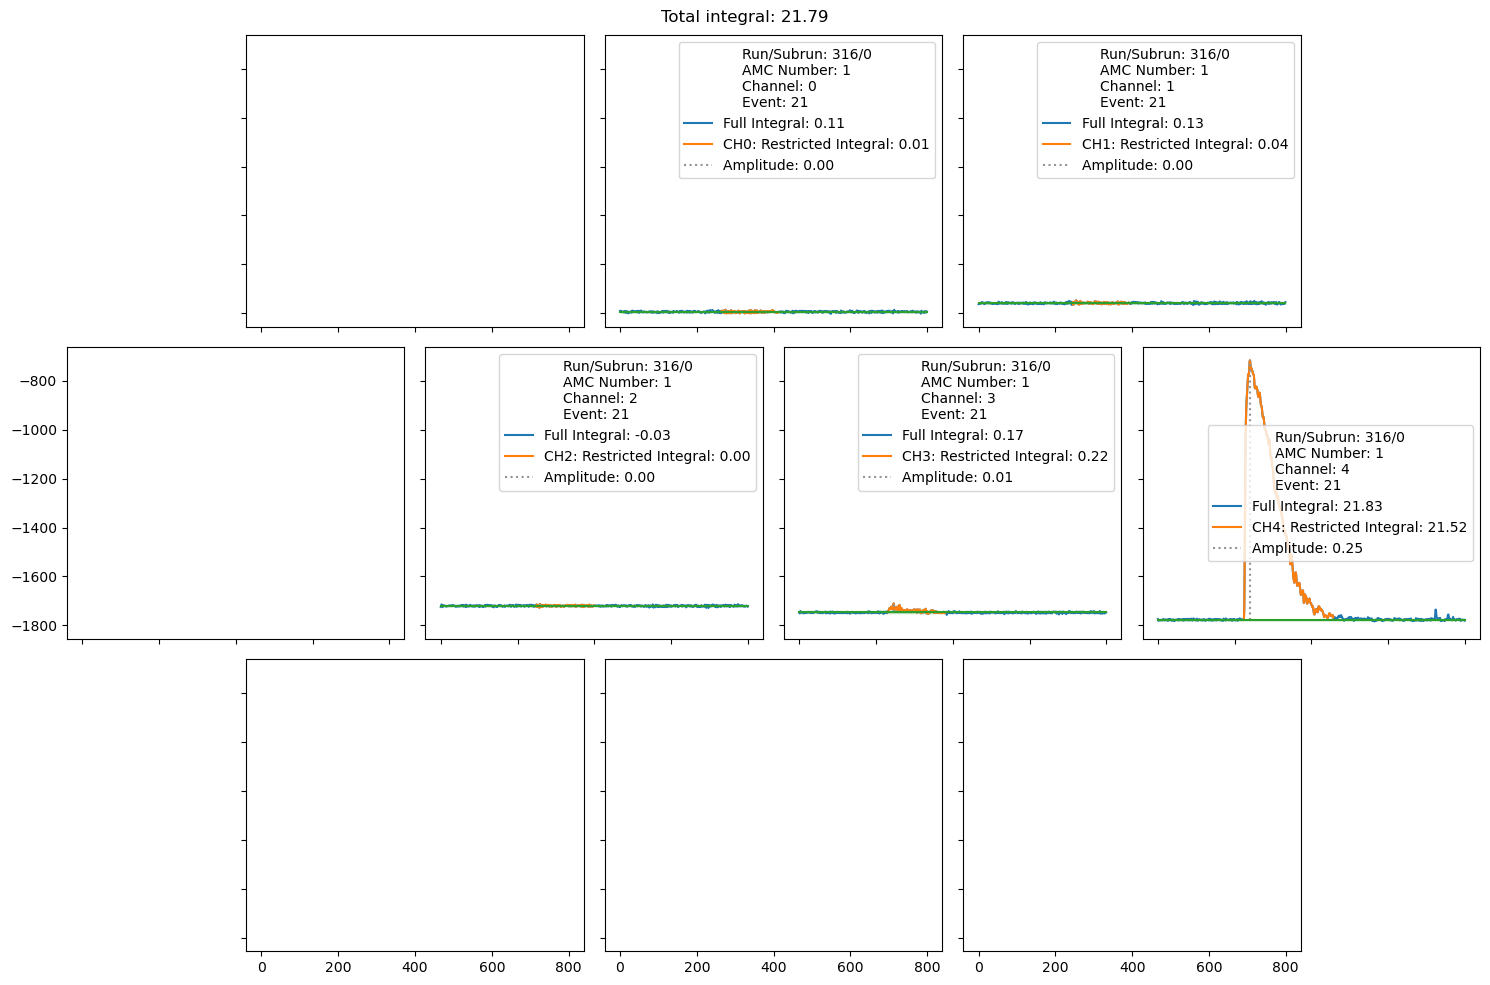

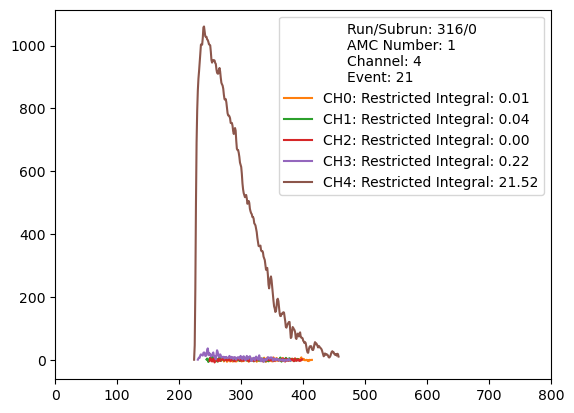

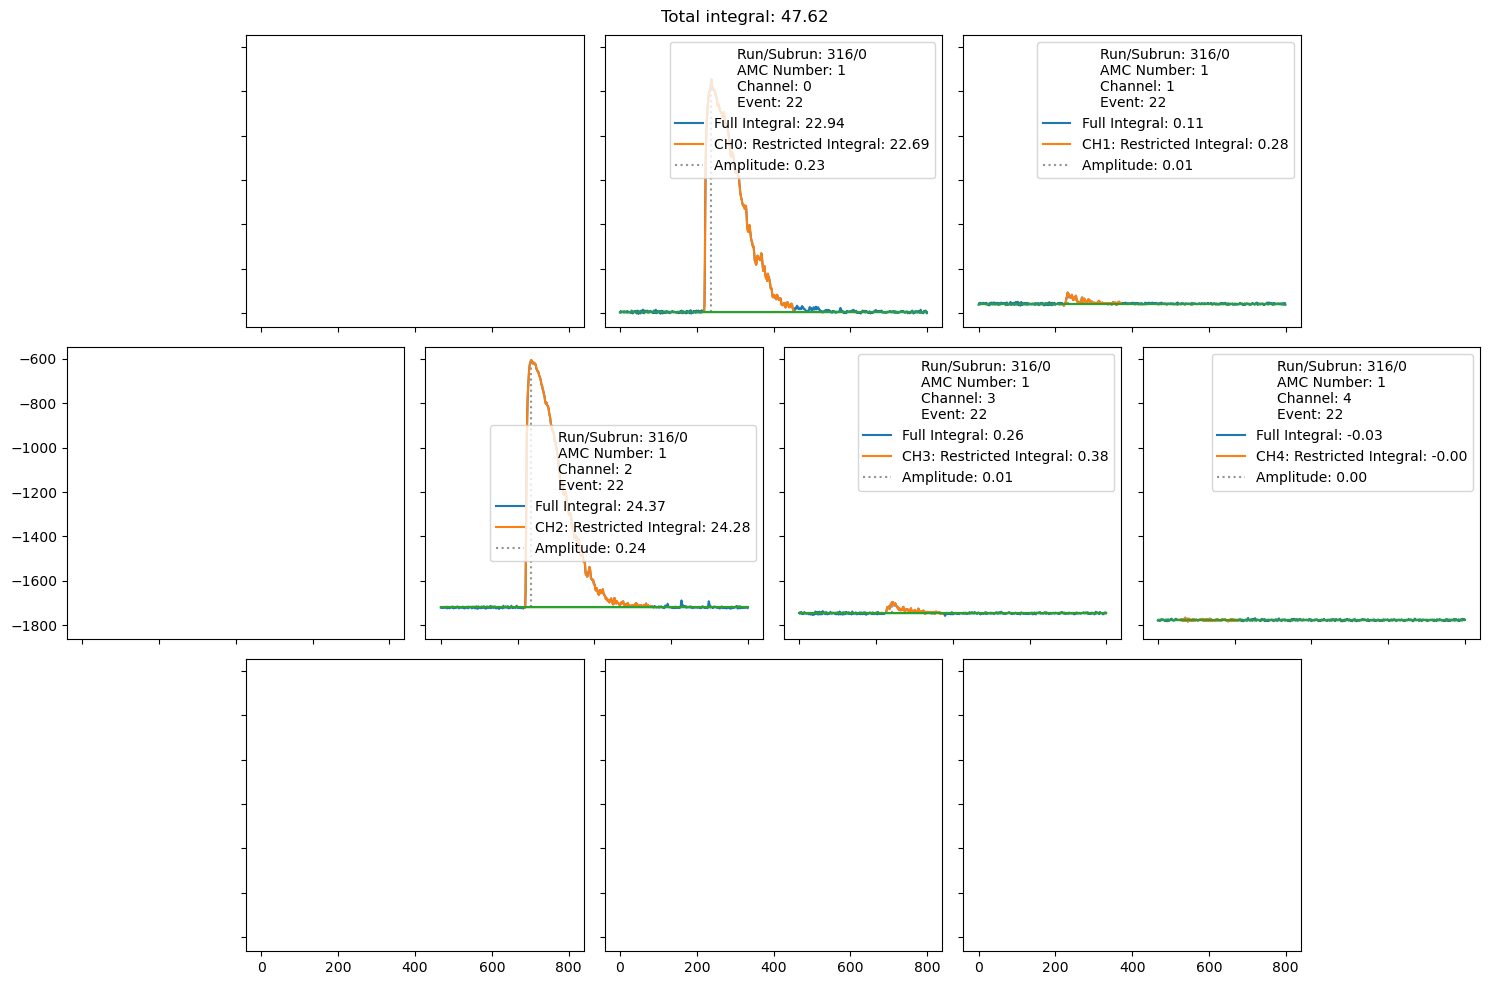

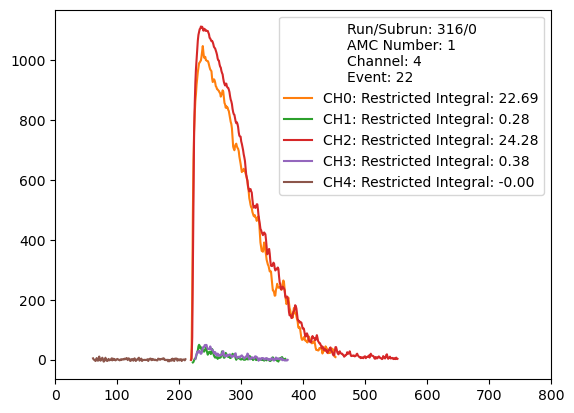

In [7]:
counter = 0
limit = 20
for i, e in enumerate(t):
    energies = [x.integral for x in e.integrals]
    if(np.amax(energies) > 40000):
        plot_event(e.integrals_calibrated)
        plt.show()

        fig,ax = plt.subplots()
        for inti in e.integrals_calibrated:
            if(inti.amcNum == 1):
                plot_integral(inti, ax=ax, subtract_pedestal=True, 
                    plot_pedestal=False, plot_amplitude=False, plot_full=False,
                    color_offset=inti.channelTag
                )
        plt.xlim(0,800)
        plt.show()

        counter += 1
        if(counter > limit):
            break

In [8]:
h = hist.Hist(
    hist.axis.Regular(1000,0,100,label='Peak Energy'),
    hist.axis.Regular(1000,0,100,label='Other Energies'),
    hist.axis.IntCategory(range(5), label='Peak Channel Number'),
    hist.axis.IntCategory(range(5), label='Other Channel Number')
)

for i, e in enumerate(t):
    if e.integrals.size() < 1:
        continue
    energies = [wfi.integral for wfi in e.integrals_calibrated if wfi.amcNum == 1]
    channels = [wfi.channelTag for wfi in e.integrals_calibrated if wfi.amcNum == 1]
    maxe = np.amax(energies)
    peak_channel = channels[energies.index(maxe)]
    h.fill(
        maxe,
        energies,
        peak_channel,
        channels
    )

h

Hist(
  Regular(1000, 0, 100, label='Peak Energy'),
  Regular(1000, 0, 100, label='Other Energies'),
  IntCategory([0, 1, 2, 3, 4], label='Peak Channel Number'),
  IntCategory([0, 1, 2, 3, 4], label='Other Channel Number'),
  storage=Double()) # Sum: 974789.0 (1069385.0 with flow)

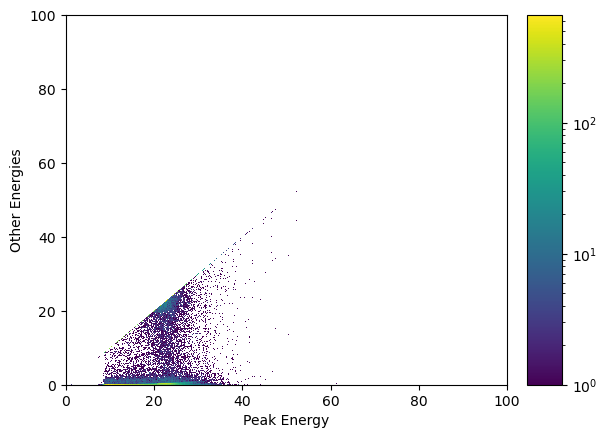

In [9]:
h[:,:,0j,::sum].plot(
    norm = matplotlib.colors.LogNorm(vmin=1)
)
plt.show()

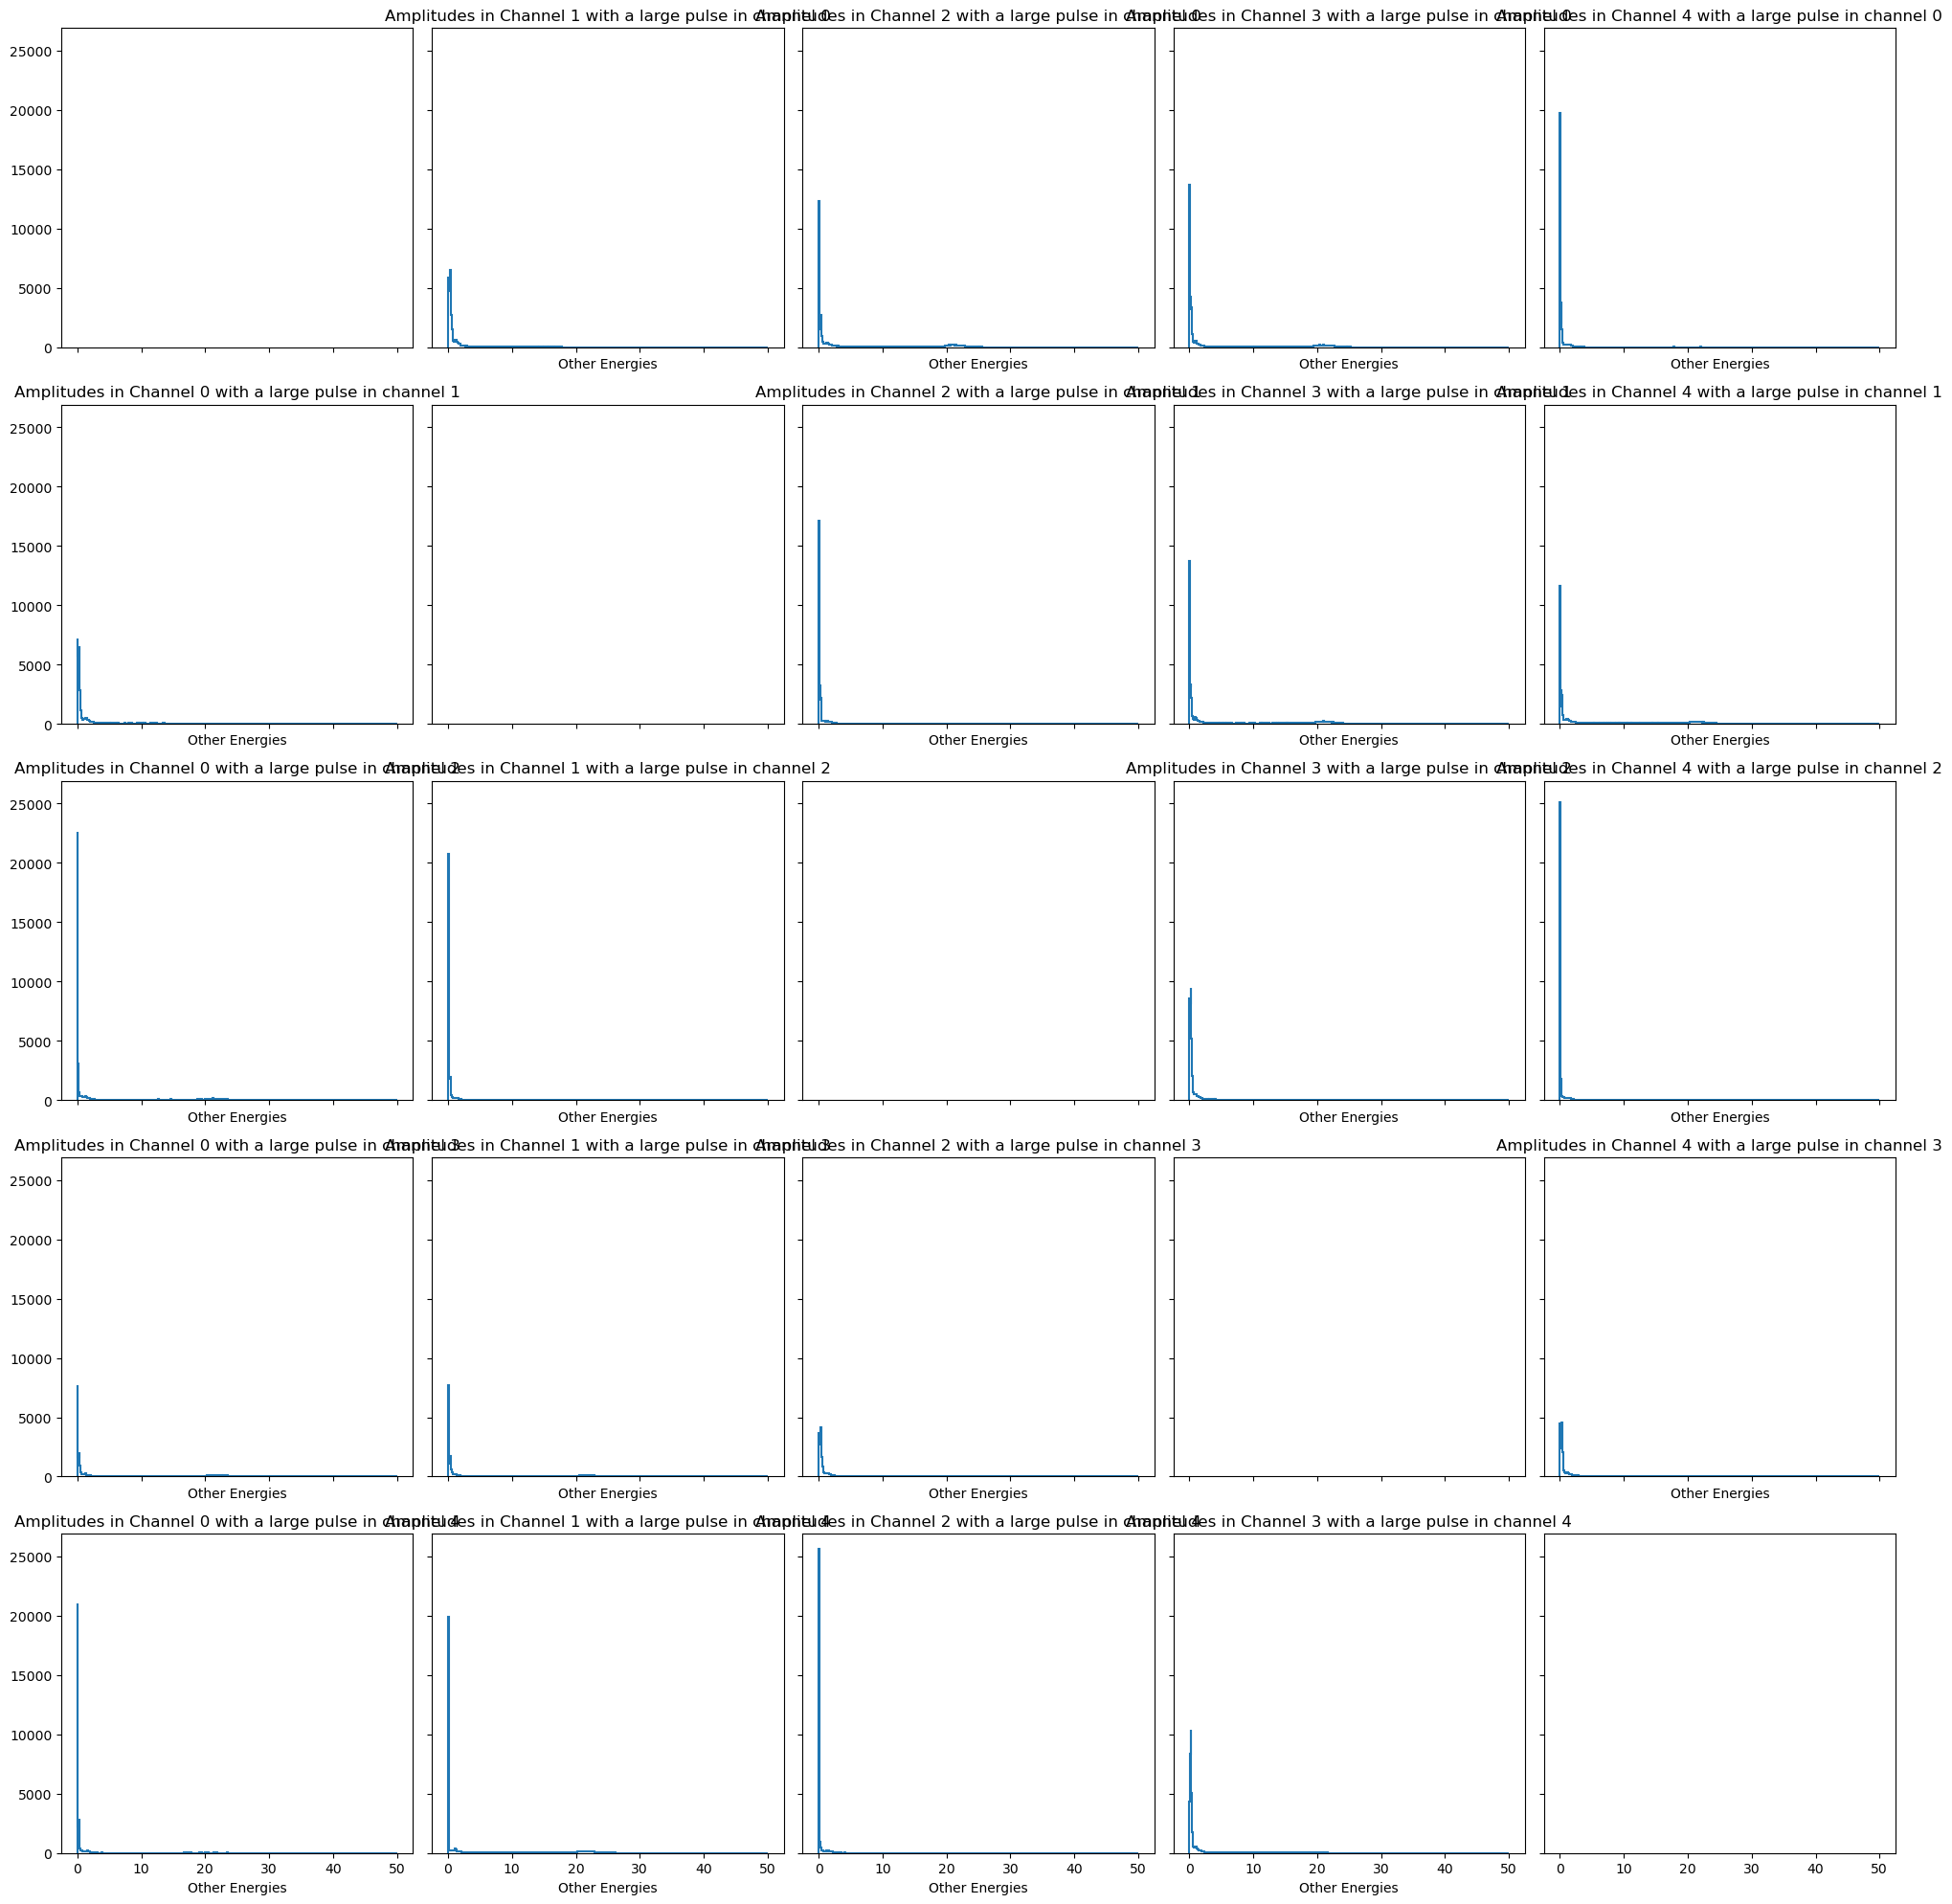

In [10]:
fig,ax = plt.subplots(5,5,figsize=(20,20),sharex=True, sharey=True)
for mainchannel in range(5):
    for otherchannel in range(5):
        if mainchannel == otherchannel:
            continue
        axi = ax[mainchannel][otherchannel]
        h[::sum,:50j,hist.loc(mainchannel),hist.loc(otherchannel)].plot(
            # norm = matplotlib.colors.LogNorm(vmin=1)
            yerr=False,
            ax=axi
        )
        axi.set_title(f'Amplitudes in Channel {otherchannel} with a large pulse in channel {mainchannel}')
plt.tight_layout()
plt.show()